댓글 뭉치를 325로 만든다음, 토큰화 하고 벡터화 시켜서, 클러스터링 or 분석

## 네이버 베스트댓글

In [23]:
comment_df = pd.read_csv('naver_best_comment_325.csv')
comment_df.tail(1)

title      genre  age  \
324  스퍼맨: 현자단의 역습  에피소드, 드라마   18   

                                              contents  
324  헷갈리는 분들 계신데 시즌2는 수위가 너무 쌔서 정식 연재는 못하고 네이버시리즈 에...

In [25]:
# 특수문자제거
import re

def preprocessing(sentence):
    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence
# comment_df['content_cleaned'] = comment_df['contents'].apply(preprocessing)

In [79]:
comment_df.iloc[111]

title                                                  정순애 식당
genre                                                스토리, 드라마
age                                                         0
contents    힐링 스멜 난다 이집  맛이 안난다면 식감밖에 안느껴진다는건가?좀 이상할 거 같다 ...
Name: 111, dtype: object

In [80]:
# comment = comment_df.contents.iloc[262]
comment1 = comment_df.contents.iloc[299] # 비질란테
comment2 = comment_df.contents.iloc[111] # 정순애식당

comment = comment1 + comment2
comment

"나 이런 내용으로 웹툰은 처음 봐...ㅈㄹ재밌을 것 같아..별테 작작하자구 이 쏴람들아  이거 디시인사이드라는 커뮤니티에서 연재했던건데 개쌉명작입니다. 안 본 사람은 꼭 보시고 철학적인 주제를 좋아하는 사람은 더더욱 보시고 본 적 있어도 그냥 한 번 더 보세요. 두 번 보세요.  카연갤 일동은 데이빗의 순탄한 연재를 기원합니다  맨날 급식물 이상한거만 쳐올라오는거보다가 이거보니 상쾌하다  카연갤 김풍이 만들고 주호민,이말년,기안84가 나온 덴데 뭘 걸러요.ㅋㅋ  본인들도 카연갤출신이라고 말하는데  루리웹 여러분 아직 제대로 보여주지도 않은 신인 작가분께 별점테러하는건 너무한것같아요..  웹툰은 베도뿐만이 아니라 다른 만화 커뮤니티에서도 스카웃해옵니다. 데이빗도 그 중 하나고요 낙하산이라고 별테하시는 분들이 있는데 엄연히 작품성을 인정받아 네이버에 정식 연재 된것이니 별테는 자제주시구 작품을 즐겨주세요  나 왜 벌써 무섭고 소름돋냐 ;;;; 진짜 재밌을거같애  루리웹 여러분 별점테러 작작하세요....  재밌기만 한데 루리웹 놈들 별점테러 하는 수준 ㅉㅉ  카툰연재 갤러리 최대 아웃풋임  10점에서 5.2로 떨어진걸 생방송으로 봤다...  선생님은 카연갤의 보배입니다  지금부터 별테하는놈들은 근으로 알겠다!  분명 들어올 때는 별점 10점이었는데 별테 왜 이러냐, 현명하고 사람과 소통할 줄 아는 돼지 데이빗  생김새가 다르다는 이유로 상대방이 인격체임을 인지하지 못하고 약자를 괴롭히는 인간 아이들. 과연 진짜 지성체는 누굴까 싶음.  데이빗이 읽은 문장들이 머리를 띵하고 친 느낌  데이빗 귀여워서 특히 불쌍함..ㅠ 철학적인 웹툰이네. 인간성에 대하여 고찰하고 나름 그 답을 찾아간다는게 너무 흥미로움  데이빗이 읽은 구절은 조지오웰의 동물농장이었던거 같네요. 지성이 있는 생명체를 인간으로 판단할지  또 한 종족전체가 아닌 개인이 지성을 가졌다면 나머지는 어떻게 해야할지. 고민해보게 됩니다. ㅠ  아버지가 굉장히 현명한 것 같음... 솔직히 데이빗은 아버지 입장으로

In [81]:
# 문장분리 2
from konlpy.tag import Kkma
kkma = Kkma()
docs = kkma.sentences(comment)
docs

['나 이런 내용으로 웹툰은 처음 봐... ㅈㄹ 재밌을 것 같아.. 별 테 작작 하자 구 이 쏴람들아 이거 디시인 사이드라는 커뮤니티에서 연재했던 건데 개쌉 명작입니다.',
 '안 본 사람은 꼭 보시고 철학적인 주제를 좋아하는 사람은 더더욱 보시고 본 적 있어도 그냥 한 번 더 보세요.',
 '두 번 보세요.',
 '카 연 갤 일 동은 데이 빗의 순탄한 연재를 기원합니다',
 '맨날 급식물 이상한 거만 쳐 올라오는 거 보다가 이거 보니 상쾌하다 카 연 갤 김풍이 만들고 주호 민, 이 말년, 기안 84가 나온 덴 데 뭘 걸러요.',
 'ㅋㅋ 본인들도 카 연 갤 출신이라고 말하는데 루 리 웹 여러분 아직 제대로 보여주지도 않은 신인 작가분께 별 점 테러하는 건 너무 한 것 같아요..',
 '웹툰은 베도뿐만이 아니라 다른 만화 커뮤니티에서도 스카웃해 옵니다.',
 '데이 빗도 그 중 하나 고요 낙하산이라고 별 테하시는 분들이 있는데 엄연히 작품성을 인정받아 네이버에 정식 연재 된 것이니 별 테는 자 제주 시구 작품을 즐겨 주세요',
 '나 왜 벌써 무섭고 소름 돋냐 ;;;;',
 '진짜 재밌을 거같애 루 리 웹 여러분 별 점 테러 작 작하 세요.... 재밌기만 한데 루 리 웹 놈들 별 점 테러 하는 수준 ㅉ ㅉ 카툰 연재 갤러리 최대 아웃풋 임 10점에서 5.2로 떨어진 걸 생방송으로 봤다... 선생님은 카 연 갤 의 보배입니다',
 '지금부터 별 테하는 놈 들은 근으로 알겠다!',
 '분명 들어올 때는 별 점 10점이었는데 별 테 왜 이러냐,',
 '현명하고 사람과 소통할 줄 아는 돼지 데이 빗 생김새가 다르다는 이유로 상대방이 인격 체임을 인지하지 못하고 약자를 괴롭히는 인간 아이들. 과연 진짜 지성 체는 누굴 까 싶음. 데이 빗이 읽은 문장들이 머리를 띵하고 친 느낌 데이 빗 귀여워서 특히 불쌍함.. ㅠ 철학적인 웹 툰이네.',
 '인간성에 대하여 고찰하고 나름 그 답을 찾아간다는 게 너무 흥미로 움 데이 빗이 읽은 구절은 조지 오 웰 의 동물 농장이었던 거 

In [82]:
from nltk.tokenize import word_tokenize
word_tokenize(docs[0])

['나',
 '이런',
 '내용으로',
 '웹툰은',
 '처음',
 '봐',
 '...',
 'ㅈㄹ',
 '재밌을',
 '것',
 '같아..',
 '별',
 '테',
 '작작',
 '하자',
 '구',
 '이',
 '쏴람들아',
 '이거',
 '디시인',
 '사이드라는',
 '커뮤니티에서',
 '연재했던',
 '건데',
 '개쌉',
 '명작입니다',
 '.']

In [83]:
# ngram=3

In [84]:
from nltk.tokenize import word_tokenize
sentences = []
for sentence in docs:
    token = word_tokenize(sentence)
    token = [t for t in token if len(t) >= 2]
    if len(token) != 0:
        sentences.append(token)
sentences[-30:]

[['매번',
  '다른',
  '사람들을',
  '위해',
  '요리해',
  '왔는데',
  '...',
  '내일은',
  '마음',
  '고생하고',
  '있는',
  '나를',
  '위해',
  '차려줘야겠어요',
  '할머님',
  '항상',
  '말하실',
  '건드시는',
  '너무',
  '귀여',
  '우시',
  '아아',
  'ㅜㅜㅜ',
  'ㅠㅠㅜㅜㅜㅠㅜ',
  '너무',
  '표현하네'],
 ['진짜', '드라마', '소재로', '딱이다'],
 ['^^',
  '딸이',
  '가게',
  '닫기',
  '싫어',
  '하면',
  '그러는',
  '데가',
  '먼저',
  '아빠한테',
  '무슨',
  '말버릇이야'],
 ['받아치니까',
  '싸움이',
  '나는',
  '...',
  '꼰대',
  '까지는',
  '아니지만',
  '나이',
  '어른들의',
  '제일',
  '나쁜',
  '버릇',
  '아빠가',
  '이었어..',
  '유머러스한',
  '알았는데',
  '가게',
  '닫지',
  '개인적인',
  '바람인데요'],
 ['정순', '식당', '같은', '만화가', '많았으면', '좋겠어요'],
 ['쉬었다', '있어서', '좋네요'],
 ['할머니', '머리핀', '바뀌시는', '귀여우셔요'],
 ['ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅜㅜㅜㅜ❤️',
  '왠지',
  '콩나물',
  '마음',
  '같다',
  '평소',
  '좋아하고',
  '곳이',
  '없어',
  '지면',
  '마음이',
  '헛헛',
  '해지고',
  '우울',
  '해지고',
  '슬픈',
  '느낌',
  '정이',
  '고파서',
  '그런다는',
  '말이',
  '슬프게',
  '들린다',
  '...',
  '사람들과',
  '정을',
  '쌓으면서',
  '잃어버린',
  '미각도',
  '천천히',
  '돌아올',
  '그냥',
  '여기',
  '나오는',
  '캐릭터들',
  '너무',
  '좋다',
  '정이',
  '고픈

In [85]:
# 불용어 제거
stop_words = "... 은 는 이 가 의 을 를 처럼 같이 비해 "
stop_words = stop_words.split(' ')

In [86]:
from gensim.models import Word2Vec

# 단어와 2차원 x축의 값, y축의 값을 입력받아 2차원 그래프 그린다
def plot_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [87]:
# 문장을 이용하여 단어와 벡터 생성
model = Word2Vec(sentences, size=100, window=3, min_count=2, workers=1)

```python
model = w2v(tokenized_data, size=100, window=2, min_count=50, iter=20, sg=1)```
- 포스태깅된 컨텐츠를 100차원의 벡터로 바꿔라.
- 주변 단어(window)는 앞뒤로 두개까지 보되, 코퍼스 내 출현 빈도가 50번 미만인 단어는 분석에서 제외해라.
- CPU는 쿼드코어를 쓰고 100번 반복 학습해라. 분석방법론은 CBOW와 Skip-Gram 중 후자를 선택해라.
- tokenized_data는 2D list로 저장된 값입니다.
- 위의 함수(tokenized_sentence)의 output을 넣어주면 됩니다.

In [88]:
# 단어벡터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [89]:
vocabs

dict_keys(['이런', '웹툰은', '처음', '...', '재밌을', '하자', '이거', '건데', '사람은', '보시고', '철학적인', '좋아하는', '그냥', '보세요', '데이', '빗의', '맨날', '이상한', '거만', '보다가', '보니', '만들고', '나온', 'ㅋㅋ', '여러분', '아직', '제대로', '않은', '너무', '아니라', '다른', '만화', '하나', '고요', '분들이', '있는데', '연재', '작품을', '주세요', '벌써', '소름', '진짜', '테러', '세요', '한데', '하는', '봤다', '들은', '분명', '때는', '사람과', '아는', '돼지', '이유로', '못하고', '빗이', '읽은', '느낌', '특히', '나름', '조지', '같네요', '있는', '인간으로', '아닌', '나머지는', '어떻게', '해야', '보게', '됩니다', '굉장히', '같음', '솔직히', '빗은', '아버지', '하고', '말을', '텐데', '저렇게', '보니까', '어디', '생각으로', '것도', '같은데', '같아요', '사람', '자기', '자신이', '알았는데', '보는', '무슨', '네이버', '두개', '안의', '얼굴에서', '많은', '나는', '학원', '좋은', '같다', '작가님', '말고', '보이지만', '때부터', '함께', '말하는', '정이', '없지', '와서', '바로', '지금까지', '먹이고', '같이', '보면', '많이', '자기가', '물어보는', '보며', '얼마나', '가슴이', '아이들은', '생각을', '모르겠지만', '실제로', '곳이', '조지는', '있었으면', '자꾸', '이용해', '먹어', 'ㅋㅋㅋㅋㅋ', '니가', '조지의', '자신의', '꿈을', '생각이', '들었네', '알고', '있지만', '생각한다', '밖에', '슬픈', '일이', '없는', '자신을', '돼지인', '없고', '구나', '장애인을', '돈을', '그러다가'

In [90]:
# 단어간 유사도 확인
# print(word_vectors.similarity(w1='만화', w2='그림체'))

In [91]:
word_vectors.most_similar('만화')

[('사람이', 0.3534919023513794),
 ('말은', 0.31521937251091003),
 ('제대로', 0.30468809604644775),
 ('편이나', 0.26064687967300415),
 ('우는', 0.2574864625930786),
 ('오늘도', 0.2565848231315613),
 ('여기', 0.2464560717344284),
 ('것만', 0.2431321144104004),
 ('눈물', 0.22803384065628052),
 ('행복했어요', 0.2253449559211731)]

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

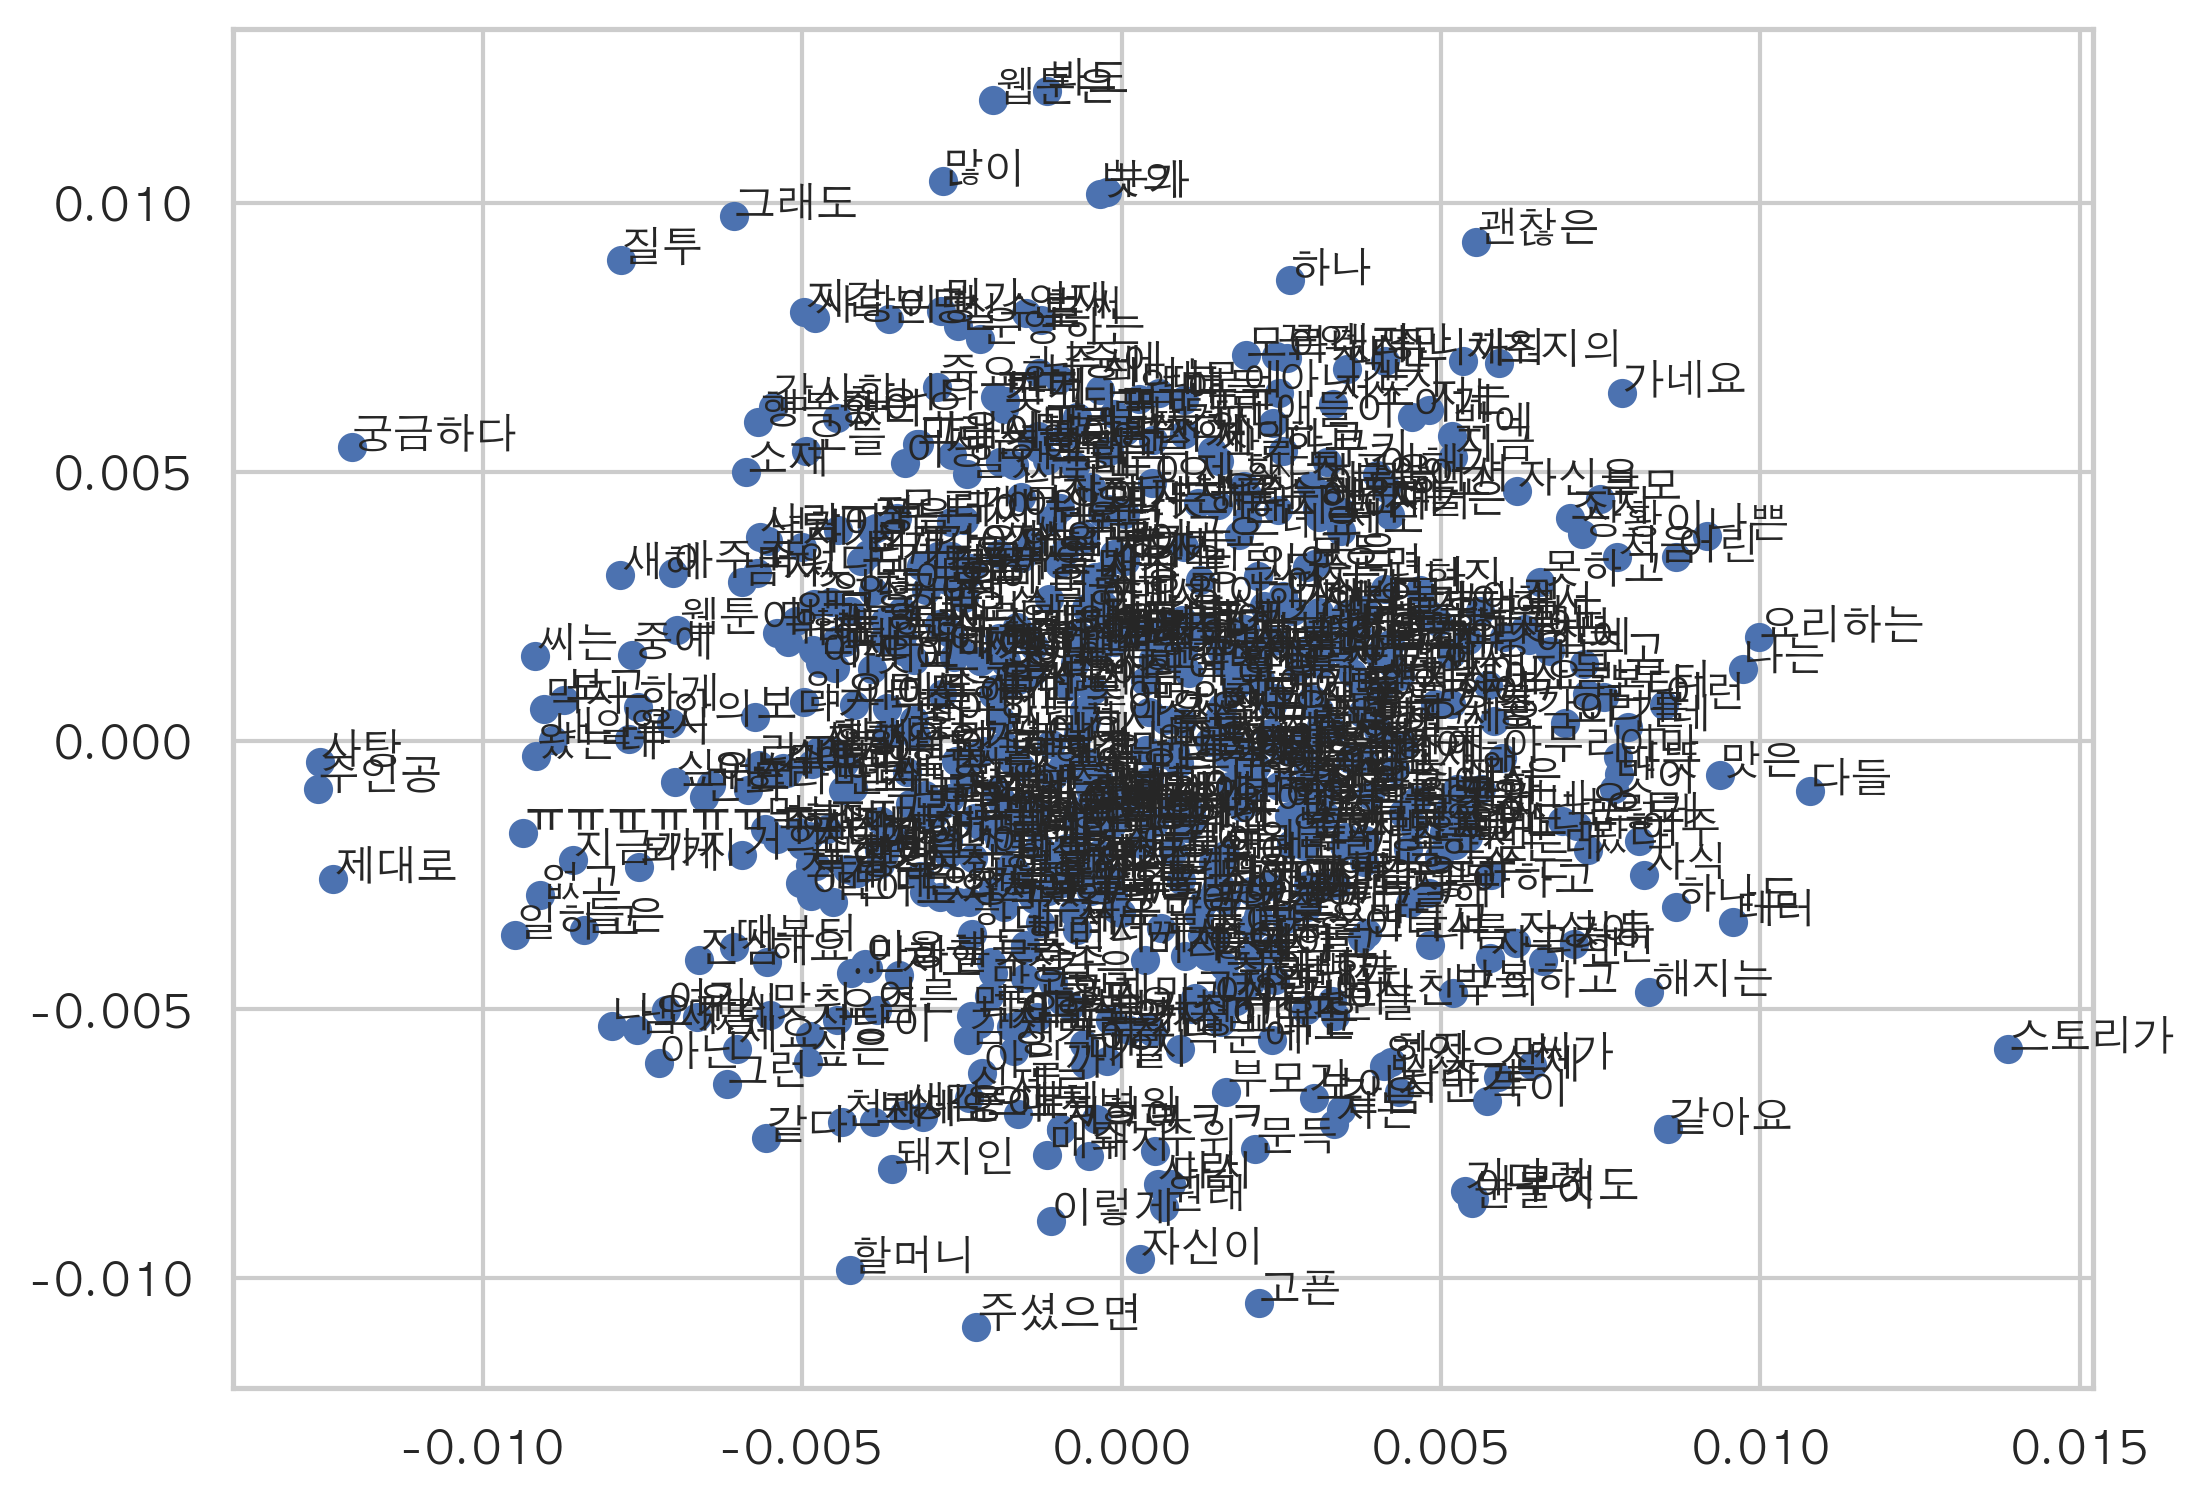

In [93]:
plot_graph(vocabs, xs, ys)

- https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221349385092&proxyReferer=https:%2F%2Fwww.google.com%2F
- word2vec

In [42]:
from sklearn.cluster import DBSCAN
from gensim.models import Word2Vec

word_vector = model.wv.vectors
match_index = model.wv.index2word
model.init_sims(replace=True)

In [61]:
# 두글자 이상인 한글만 사용
han = re.compile(r'[가-힣]{2,}')
# eps: 사용자가 정한 거리, min_samples: 최소 클러스터 원소수
dbscan = DBSCAN(eps=1, min_samples=0)
clusters = dbscan.fit_predict(word_vector)

In [62]:
df = pd.DataFrame(clusters, columns=['cluster'], index=match_index).reset_index()
df.columns = ['word', 'cluster']
print(len(df))
df.head()

63


word  cluster
0   데이        0
1  ...        1
2  조지는        2
3   빗이        3
4   이런        4

In [63]:
# 한글만 필터링처리
df = df[df['word'].apply(lambda x: len(han.findall(x)) > 0)]
df.head()

word  cluster
0   데이        0
2  조지는        2
3   빗이        3
4   이런        4
5  사람은        5

In [64]:
len(df.word.unique()), len(df.cluster.unique())

(62, 62)

In [65]:
# 노이즈포인트 제거
df = df[df['cluster'] != -1]

df.groupby(['cluster']).count()

word
cluster      
0           1
2           1
3           1
4           1
5           1
...       ...
58          1
59          1
60          1
61          1
62          1

[62 rows x 1 columns]

### K-means

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

In [8]:
from konlpy.tag import Kkma
kkma = Kkma()
docs = kkma.sentences(comment)
docs

['떨어진 앤 줄 알았는데 괴롭힌 애네 외모 지상주의 박태준 작가 님이랑 프리드로 우 전선 욱 작가님 조합이라니',
 'ㄷ ㄷ 어떤 학원 물이 생길지 미쳤네',
 '일 진이 찐 따 몸에 들어가서 과거 자기를 만난 거임 ㅋㅋㅋㅋ ㄲ 진짜 일진들은 나중에 열심히 살아도 절대 성공 못했으면 작가님 들 조합 ㅁ ㅊ네 지금 유 튜브만 봐도 일진들 대성공했던데 ㅋㅋㅋㅋㅋ 외제 차 끌고 술집 차리고 몰래 카메라 주작하고 댓 글들은 웃기고 잘생겼다며 빨아 주고 ㅋㅋ ㅋㅋ 밑에 지양 아치라고 자랑하는 애 있네',
 'Galois 나도 학창시절 때 개양 아치였고 애들 엄청나게 괴롭혔는데 지금은 살인데 사업하나 대박 터지고 돈도 많이 벌어서 억이나 있고 잘 나 감 지금은 수능공부해서 명문대 늦게 와서 대학 라이프를 즐기는 중인데 무 튼 나쁘게 사는 게 제일 좋음 ㅋ찐따인애들은 찐 따 인 이유가 다 있음 찐 따 애들 내 앞에 나타나면 다 죽일 거 임 이러는데 ㅋㅋ 박제요 진짜 요즘 세상 보면 권선징악은 다 옛날 얘기 임 왜 안 읽었는데 벌써 재밌을 꺼 같지 주제 개 신 박하네 일진 학 폭 가해자들 지들이 한 짓 기억 못하는 거 보면 진짜 화나 죽겠음 피해자들은 몇 년이 지 나도 고통 받는데 가해자들은 몇 년이 지 나도 지들 나름 행복하게 잘만 살더라',
 '학 폭 가해자들은 성공 못했으면 좋겠다',
 '그래서 여기 댓 글에 찐 따 들은 지들 잘못이라고 하는 애들 니네',
 '본인이 가해자라는 거 증명하는 거지 ㅋㅋㅋㅋㅋㅋㅋㅋ 와 내용이 새로워요 재미있습니다',
 'ㅎㅎ 일단 제목이 내 일기장이라 믿고 봐 본다 저 자물쇠로 어케 치 노 안 철 아 그 와중에 김 김 김 진우로 부르네',
 '반성 안하네 대 크루 통합이 먼 절 까 대 ㅈ 망 사건을 막는 게 먼 절 까 수능 일전에 이걸 보고 있는 내인 생이 존망이다',
 'ㅋㅋ 정신 차려 수능 디 ㅋㅋ ㅋㅋㅋㅋㅋ 잠깐 저거 도륙 드립 돌아온 럭키 짱 드립 이자 너 ㅋㅋㅋㅋㅋㅋ 동 까 어릴 때 애들 괴롭히던 애들이 성공한다는 게 뭐 같다'

In [23]:
# 군집화 할 그룹의 갯수 정의
n_clusters = 5

# CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
X

<10691x24419 sparse matrix of type '<class 'numpy.int64'>'
	with 44232 stored elements in Compressed Sparse Row format>

In [24]:
# l2 정규화
X = normalize(X)
X

<10691x24419 sparse matrix of type '<class 'numpy.float64'>'
	with 44232 stored elements in Compressed Sparse Row format>

In [25]:
# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=n_clusters).fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# # labels에 merge
# df['labels'] = labels

In [4]:
# from nltk.tokenize import word_tokenize
# from collections import Counter
# from wordcloud import WordCloud
# from konlpy.tag import Okt

In [48]:
# vectorizing
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
X

<275x2705 sparse matrix of type '<class 'numpy.int64'>'
	with 4008 stored elements in Compressed Sparse Row format>

In [49]:
# L2 normalizing
X = normalize(X, norm='l2')
X

<275x2705 sparse matrix of type '<class 'numpy.float64'>'
	with 4008 stored elements in Compressed Sparse Row format>

In [50]:
# training k-means
kmeans = KMeans(n_clusters=2).fit(X)

In [43]:
# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [ ]:
plt.scatter(r['0'],r['0'], c=r['predict'],alpha=0.5)

In [46]:
centers = pd.DataFrame(centers, columns=['0', '1'])

center_x = centers['0']
center_y = centers['1']

plt.scatter(center_x,center_y, s=50, marker='D',c='r')

plt.show()



ValueError: Shape of passed values is (2, 2705), indices imply (2, 2)

In [24]:
from soyclustering import proportion_keywords
# list of str form
vocabs = [vocab for vocab, idx in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])]
labels = kmeans.labels_
centers = kmeans.cluster_centers_

keywords = proportion_keywords(
    centers,
    labels=labels,
    index2word=vocabs)

In [27]:
keywords

[[('그냥', 1.0),
  ('이런', 1.0),
  ('재밌다고', 1.0),
  ('거지', 1.0),
  ('저런', 1.0),
  ('하면', 1.0),
  ('말고', 1.0),
  ('학교', 1.0),
  ('애들', 1.0),
  ('때문에', 1.0),
  ('합니다', 1.0),
  ('나도', 1.0),
  ('일진', 1.0),
  ('이상', 1.0),
  ('하지', 1.0),
  ('와중에', 1.0),
  ('난리', 1.0),
  ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 1.0),
  ('구름', 1.0),
  ('스토리', 1.0),
  ('지주', 1.0),
  ('가깝습니다', 1.0),
  ('정말', 1.0),
  ('세계관', 1.0),
  ('있네', 1.0),
  ('네이버', 1.0),
  ('애가', 1.0),
  ('다시', 1.0),
  ('아니라', 1.0),
  ('생각', 1.0),
  ('관장입니다', 1.0),
  ('된다', 1.0),
  ('갖췄네', 1.0),
  ('너무하네', 1.0),
  ('느껴진다', 1.0),
  ('던지네', 1.0),
  ('망했다고', 1.0),
  ('모르냐', 1.0),
  ('몰랐어', 1.0),
  ('슬프네', 1.0),
  ('슬프다', 1.0),
  ('이쁘네', 1.0),
  ('재밌었다', 1.0),
  ('즐거웠다', 1.0),
  ('이렇게', 1.0),
  ('했다', 1.0),
  ('용서', 1.0),
  ('15년', 1.0),
  ('위해', 1.0),
  ('지금', 1.0),
  ('약한', 1.0),
  ('이유', 1.0),
  ('이제', 1.0),
  ('있을', 1.0),
  ('나만', 1.0),
  ('남자가', 1.0),
  ('물이', 1.0),
  ('벌꿀', 1.0),
  ('ㅎㅎ', 1.0),
  ('것도', 1.0),
  ('작가', 1.0),
  ('본인이', 1.0),
  ('자신을', 1.0),
  ('

In [35]:
import gensim # version=3.6.0
from gensim.models import LdaModel
import pyLDAvis # version=2.1.1
import pyLDAvis.gensim as gensimvis
# from lovit_textmining_dataset.navernews_10days import get_bow

### K-means

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
from soyclustering import SphericalKMeans
# from lovit_textmining_dataset.navernews_10days import get_bow

# x, idx_to_vocab, vocab_to_idx = get_bow(date='2016-10-20', tokenize='noun')
x = docs
x_tfidf = TfidfTransformer().fit_transform(x)

kmeans = SphericalKMeans(n_clusters = 200)
labels = kmeans.fit_predict(x_tfidf)

ValueError: Expected 2D array, got 1D array instead:
array=['떨어진 앤 줄 알았는데 괴롭힌 애네 외모 지상주의 박태준 작가 님이랑 프리드로 우 전선 욱 작가님 조합이라니'
 'ㄷ ㄷ 어떤 학원 물이 생길지 미쳤네'
 '일 진이 찐 따 몸에 들어가서 과거 자기를 만난 거 임? ㅋㅋㅋㅋ ㄲ 진짜 일진들은 나중에 열심히 살아도 절대 성공 못했으면 작가님 들 조합 ㅁ ㅊ네 지금 유 튜브만 봐도 일진들 대성공했던데 ㅋㅋㅋㅋㅋ 외제 차 끌고 술집 차리고 몰래 카메라 주작하고 댓 글들은 웃기고 잘생겼다며 빨아 주고 ㅋㅋ ㅋㅋ 밑에 지양 아치라고 자랑하는 애 있네'
 'Galois 2019-11-10 23:22 나도 학창시절 때 개양 아치였고 애들 엄청나게 괴롭혔는데 지금은 29살인데 사업하나 대박 터지고 돈도 많이 벌어서 20억이나 있고 잘나감. 지금은 수능공부해서 명문대 늦게 와서 대학 라이프를 즐기는 중인데 무 튼 나쁘게 사는 게 제일 좋음 ㅋ찐따인애들은 찐 따 인 이유가 다 있음. 찐 따 애들 내 앞에 나타나면 다 죽일 거 임 이러는데 ㅋㅋ 박제요 진짜 요즘 세상 보면 권선징악은 다 옛날 얘기 임 왜 안 읽었는데 벌써 재밌을 꺼 같지 주제 개 신 박하네 일진 학 폭 가해자들 지들이 한 짓 기억 못하는 거 보면 진짜 화나 죽겠음. 피해자들은 몇 년이 지 나도 고통 받는데 가해자들은 몇 년이 지 나도 지들 나름 행복하게 잘만 살더라;; 학 폭 가해자들은 성공 못했으면 좋겠다'
 '그래서 여기 댓 글에 찐 따 들은 지들 잘못이라고 하는 애들 니네'
 '본인이 가해자라는 거 증명하는 거지 ㅋㅋㅋㅋㅋㅋㅋㅋ?? 와 내용이 새로워요.. 재미있습니다'
 'ㅎㅎ 일단 제목이 내 일기장이라 믿고 봐 본다 저 자물쇠로 0520 어케 치 노 안 철 아 그 와중에 김 김 김 진우로 부르네'
 '반성 안하네 4대 크루 통합이 먼 절 까 ,4 대 ㅈ 망 사건을 막는 게 먼 절 까? 수능 3일 전에 이걸 보고 있는 내인 생이 존망이다'
 'ㅋㅋ 정신 차려 수능 디 ㅋㅋ😭😭 ㅋㅋㅋㅋㅋ 잠깐 저거 도륙 드립 돌아온 럭키 짱 드립 이자 너 ㅋㅋㅋㅋㅋㅋ 동 까..? 어릴 때 애들 괴롭히던 애들이 성공한다는 게 뭐 같다'
 '진짜 그 와중에 자물쇠 걸어 놓은 거 웃기다고' '생각하고 있네' '천 성 자체가 갱생 불가인 듯 살려주세요'
 '너무 재밌어요....' 'ㅠㅠㅠ 장안 철은 진심으로 자기를 죽이려 르는 눈빛을 보았다'
 '옛날 같은 경우는 싸움 잘해서 저런 위치에 있지만 요즘은 그게 아니고 성격 때문에 저런 위치에 있는 애들 많음 활발하다거나 나대거나 근데 저런 애들 특징은 소심한 애들을 건든다는 거 임 찌 질하게 지가 머 라도되는 것처럼 운동하는 애들은 안건 듬 지들이 머 라도되는 것처럼 저런 애들은 또 반에서 지가 잘 부르는 것처럼 노래 부르겠지'
 '진짜 싫어 코 노 가면 되는 거를 찐 따 에는 두 가지 분류가 있음 1. 그냥 약해 보여서 멍 청해 보여서 못생겨서 2. 찐 따 짓으로 남한테 피해 주고 다녀서 보통 초 중 딩 때 1번 이유로 괴롭히는 놈들이 많고 좀 커서 이성이란 게 생기면 2번 이유로 괴롭히더라'
 '제 3자 입장에서 보면 1번처럼 이유 없이 괴롭히는 ㅅㄲ들은 학교 징계가 아니라 좀 만 낌새 보여도 초딩이라도 소년원에 쳐 넣어야 한다고 생각함 근데 2번은 솔직히 당해도 싼 놈 들이 있음 쎄보일려고 입학 첫날 교실에서 담배 피질 않나'
 '뒤에서 뒷담 오지게 까고 다니고 이리 붙었다 자리 붙었다 이간질하고 지 편한 대로 남 생각 1도 안하는 찐 따 왕따 당하는데 당해도 싸다고'
 '느낌 1 시간 못 참아서 결제한 흑우입니다'
 "ㅎㅎ 장담하는데 일진들은 이 만화 보면서 자기네 반 찐 ㄸ 들 데리고 ' 왜 18 너도 이런 상상하냐?"
 "' 이러면서 괴롭히고 있을 꺼다." '슬프다.' '두려워하지 말고 꼭 신고 해라.'
 '자존심 상한다 뭐 이런 생각 말고 3 공주 가운데 백도 화지 닮았당'
 'ㅋㅋㅋㅋ 오줌 싸다가 손에 튀었을 때 참 ㅈ 같았는데 쟨 온몸에 튀었으니 개 빡 칠 만했다 ???: 소프트웨어는 좋은데 하드웨어가 부족하군..'
 'ㅋㅋㅋㅋㅋㅋ 킹스 맨드립 돌았냐고 진짜 ㅋㅋㅋㅋㅋ 아니 너무 ㅋㅋㅋㅋ 존나 재밌네' '두 학교 물이 합치면 이런 걸 만드네'
 '근데 심 슨 약간 로꼬 닮지 않음? 주인공이 싸울 방법은 아는데 몸이 안 따라 줘서 질 것 같음 ㅋㅋ 오줌 누는데 저려면 누가 참냐?'
 '나도 못 참겠다 근데 저기 학교 화장실 아니에요?'
 '기저귀 가는 데가 왜 있는 거에요? ㅋㅋㅋㅋㅋㅋ 웹 툰 전개로 보면 사이다 같을 지 모르지만 뜯어보면 내용이 너무 역겹다.'
 '본인은 당해 보면 하루도 못 참을 괴롭힘이면서 그 긴 시간을 괴롭혀 놓고 나중엔 고작 학창시절의 일일뿐? 한심하다 으응?? 생각보다 재밌는데?? 도륙 컷 나올 때마다 왤케 웃기 냨 ㅋㅋㅋㅋㅋ 전에는 한 손 도륙에서 이번엔 양손 도륙이네'
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 제익이랑 동까랑 짝이었네'
 '아니 대체 공중 화장실도 아니고 학교 화장실에 기저귀 가는 곳이 왜 있는 거죠...?'
 '다 빈 이가 프리드로 우 애들보다 이쁜 거 같다?'
 '같은 반 친구가 친구한테 행하는 온갖 폭력과 학대가 아주 재밌게 표 현되 있네.'
 '적어도 이런 거 만들려면 진지하게는 만들어야 되는 거 아닌가.'
 '저런 괴롭힘이 그냥 웃으면서 노닥거릴 수준의 일들인지 정말 모르겠다.'
 '뭔 짐승인데 저 건 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 일진 족 망 스토리 아니였냐'
 '아니 왜 일진 새기 찐 따 몸 가도 학교제 패각인데? ㅋㅋㅋ 정보 2) 벌꿀 오소리는 빡치는 선도 존나 없어서 존나 싸우기 위해 태어난 생명체임 ㅋㅋ 정보) 주인공 뒤에 나타난 동물은 벌꿀 오소리로 지 빡 치면 사자한테 도 덤벼드는 상 남자 동물이다 한 번에 3 화 결제해 버린 흑우 있누?'
 '^l 발 3 화 순식간에 결제했네' '인생 ㅈ 망했다 낯선 찐 따 에게 서 내 남자의 느낌이 난다...? 솔직히 사기 아니냐'
 '이 스토리에 이 익숙한 학원물 개 쩌는데? 흑우 같지만 600원 안 아깝다 하는 사람 손 들자 박태준이 이딴 병맛 넣자 했을 것 같다'
 'ㅋㅋㅋㅋ 벌꿀 오소리: 벌꿀 오소리 (Honey Badger) 는 족제비과에 속하는 종으로 인도와 남부 아시아 및 아프리카에 널리 서식한다.'
 '[1] 성질이 거칠어 자기보다 큰 동물을 상대하는 등 대형동물을 습격하기도 한다.'
 '벌을 먹기 위해 벌집을 털기도 하며 이에 따라 인간과의 충돌이 발생하기도 한다.' '수분을 위해서는 과일을 먹기도 한다.'
 '주로 검은 맘 바를 잡아먹기로 유명하다.'
 '이 걸로 확실 해졌다 박태준은 일진 빠돌이 일진 미화를 좋아함. 학창시절에 일진을 우상시 여겼거나 일진이었던 자신을 엄청 높게 평가할 수도 짐승 ㅈㄴ 귀엽게 셍 겼네'
 'ㅋㅋㅋㅋㅋㅋㅋ 이 형들 불금 불토 제패했더니 이제는 월요병도 없애줄려나 보네'
 '아니 그니까 쿠키를 여기까지 구우면서 봤는데 이 모든 게 하루만에 일어난 일들이라고? ㅋㅋㅋㅋㅋㅋ 주인공 아직 집 한번 못 간상태였구나'
 '개꿀 잼 ㅋ ㅋㅋㅋ 프리드로 우 보다 재밌다고' '주 2회로 가 자는 놈은 뭐냐????' '너무하네'
 '작가님 월 목으로 가는 거 어떨까요?' 'ㄹ ㅇ 외모 지상주의 꿀 잼요소랑 프리드로 우 그림 채랑 합 쳐져서 더 꿀 잼이잖아'
 '프드 연종하라는 건 좀 심하지 않나...?' '걍 재밌다고' '하면 되지 꼭 쳐 비교하네'
 'ㅋㅋ 연재 종료가 작가에게 할 말이냐'
 '농담이 여 도선 넘 노 ㅋㅋ 나만 지르는 줄 알았는데 다 지르구 나 ㅋ 한 체육관에 관장입니다.'
 '실제 학생들이 운동하는 곳에서까지 저렇게 양아치 짓 거리 하지 않으니 안심하시고 격투기 배우 실 분은 배우 시러 가시면 되요'
 '^^ 만화는 만화로만 즐겁게 감상 해 주시 길 바 래요 ! 왤케 재 밌냨 ㅋㅋㅋ 솔직히 박 태준 작가님 작품들 스토리고 뭐고 일단 재밌는 건 팩 트임 ㄹ ㅇ 솔직히 1 화 보고 2 화에서 쿠키 지르기 아깝다는 생각 들었는데 정신 차리니까 다음 화가 안 눌려 다 봤어..'
 '근데 나만 ㅈ 같나...?'
 '김 진우는 저 상황에서 누구 패지도 못하고 있었을 텐데 정작 괴롭힌 놈은 그때로 돌아가서 ㅈ 같은 상황은 커 녕 지 맘대로 행동하고 있으니... 나였으면 빡쳐서 직접 팼을 듯 알고 보니 저 노란 머리에 김 진우 들어 가있 는 거 아님? 면전에다 대고 연재 종료 하라하네'
 'ㅋㅋㅋㅋ 독자 수준 재 밋 다 ㅋㅋㅋ 5회까지밖에 안 나와서 정 주행 5번은 햇네'
 '벌꿀 오소리 이모 티 콘도 있음🦡 아 닠 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 프리드로 우 작가 님 아니 랄 까 봐 동 까 가 왜 있엌 ㅋㅋㅋㅋㅋㅋㅋㅋ 실력은 빙 진우가 더 뛰어나겠지만 결국 체급 차를 극복 못하고 지는 스토리로 갈 듯 빙 진우가 기술적으로 더 뛰어나것지만 지금 빙 의해 있는 몸은 과거의 자신이 괴롭히던 멸치 놈 몸 임 기술이 좋다 해도 질 것 같고 하지만 관장이 대련하는 거 보고 본격적으로 빙 진우 키울 듯 작가님 이유 없이 담 편 주실 순 없나요'
 '중간 다이어트 반에 동 까 있음 ㅋㅋㅋ ㄱ 이전에 과거의 난 그라운드에 약할 때 라는 대사가 있음 못 이기지는 않을 듯 근데 장안 철 성격상 이기며 백 타 빙 진우 복면 벗기려 할 텐데? 벗겨지면 당연 미래도 바뀌는 거고 여기선 장안 철이 숨도 못 쉬고 쳐 발려야 한다.'
 '본래 주 짓 수도 작은 체급이 체급 극복하려고 만들어 진 것이니까 기술적으로 이미 선 수급인 빙 진우가 고 딩 시절 타격만 고집하던 본인에 겐 질 이유가 없다.'
 '아니면 경기 내내 샤워하던 저 누나가 말리겠지.' '고작 고 딩 따리 우물 안 개구리를 프로 무대까지 경험한 애가 지겠냐'
 '생각 좀 하자 경험 무시 못한다 돈 주고도 못사는 거다'
 '빙 진우가 이겼으면 좋겟다는 사람 모 여주 새요 요즘 박태준 작가님 산삼을 드셨나..'
 '너무 잼 있는 만화 많이 그리 시네... 아아.. 동 까 여기서 살뺀 거였구나' 'ㅋㅋㅋ 중간에 보이네'
 '뭔 가 장안 철 발리다가 안돼 자존심을 세워야 해라고 하고 ㅈ ㄴ 비겁하게 싸우면서 진우 복면 벗기고 김 김진 진우 우 ?라고 말하고 아무튼 그런 스토리로 갈 것 같다고'
 '내가 왜 말하고 있는 거지 암 튼 이 웹 툰 찡 재밌네'
 'ㅎㅎ ㅋㅋㅋ ㅋㅋㅋㅋ 박태준 작가님 천재 그 중 동 까 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 다음화 마렵네 안녕하세요.mma'
 '체육관 관장입니다.' '이 웹툰에 나오는 기술은 다 맞습니다.' '네' '그냥 자랑하고 싶었습니다.'
 '아 잉🥰🥰 박 태준 이 정도면 ㄹ ㅇ 악마의 재능 인정. 인생 존망 외모 지상주의 싸움 독학 같은 학원 물인데도 다 다른 느낌으로 잼 있음. 욕도 많이 먹는데 작품성은 몰라도 재미있게 만드는 능력은 천부적인 듯 아오'
 '왜 친구들이 계속 김 김진 진우 우라' '부르나 했더니 이 웹 툰 때문이였네'
 '12월 말에 보시는 분들 거기 지금 눈 내리나요?'
 '근데 저렇게 가다간 장안 철 인생이 나락으로 갈 듯 하네 관장한테 도 이미 찍혀 버렸고 외모 지상주의보다 이게 더 재미있네.'
 '외모 지상주의는 갈수록 무협물 되는 느낌인데 이거는 현실적인 학원 물임 근데 얘 김 진우 집 어떻게 알고 찾아가서 자고 등교한 거 임 ㅇ? 이 웹 툰 때문에 세상에 모든 김 진우가 김 김진 진우 우가 되겠구나....'
 '이게 프리드로 우랑 외모 지상주의 만드시는 분들이 만든 거구나 외모 지상주의는 나한테 개 노 잼 삼류 만화인데 인생 존망이랑 싸움 독학은 왜 씹띵 작 스멜이냐'
 'ㄷ ㄷ 박태준은 어떤 사람이길래 기술을 웰케 잘 알지? 미래의 나야 잘 지내니? 나는 어쩌다 쿠키 6개를 써 버렸어.'
 '하 핫 그래도 시간을 되돌릴 수 없으니깐. 아 맞다 참! 내일 있을 국어 기가 역사 시험은 어떻게 됐니?' '아 망했다고?'
 '역시 그럴 줄 알았어.'
 '그래도 어쩔 수 없는 일이니깐.. 어쨋든 미래의 나야 인생 잘 망하고!!! 그럼 안녕!! 자기가 과거의 자신을 참교육 ㅋㅋㅋ ㅋ 베 댓 님 아 잉 ㅋㅋㅋㅋㅋㅋㅋㅋ 한 태성 이태성 장 안 철 박 형석 유 호빈 중 누가 제일 쎌까?'
 '양홍원이 용서 받으면 안되는 이유 저렇게 설명해 봤자'
 '현실에 선 양아치들 반성 안한다 첫 번째 사건이 이 정도면 나머지는 얼마나 심하다는.. 와 김 진우 진짜 불쌍하다 친구도 잃고 열심히 노력해서 성적도 잘 나왔는데 모함 때문에 인생도 망하고 인생 존망 이거 진짜 명작이다 근데... 외모 지상주의 보다 훨씬 학 폭에 대해 깊이 고민하고 스토리를 쓴 게 보임.. 전 개가 어떻게 될지 모르겠지만 단순 일진 미화 스토리로 안 갔으면 하네요.'
 '저런 ㅅ 끼는 사회 매장시켜야 함. 학생 때는 지가 왕인 줄 알고 깝치다가 나중에는 좀 잘난 걸로 MMA 선수나 해먹고 있냐?'
 '갱생이 아니라 빵을 보내야지' 'ㅋㅋ 용서 받으려 하지 말고 죗값 받아라' '안 철아 생기 부에 왕따 가해 자라고 찍혔다고..?'
 '난 인생 존망이어도 뭐 장 안 철한테 맞아서 팔이 부러졌나'
 '이런 거 생각했는데, 둘이 싸움 시키는 건 심한데;; 이런 게 4번이 있었으니까 나중에 애가 말을 더듬지.. 슬기 대단하네... 개 멋 잇다 저런 친구 있으면 좋겠다'
 'ㅋㅋ 와 이제 외지상보단 쌈 독 인생 존망에 쓰는 쿠키가 훨씬 달달 하다 .이 웹 툰 보면서 이렇게 느끼는 사람 한둘이 아닐 꺼야 와 근데 진짜 외지 주랑 내용이 클라스가 다른데? 처음으로 쿠키 주고 보는데 웹 툰 안에 담긴 뜻도 스토리도 진짜 명작이다 이건 이대로만 이어서 갔으면 좋겠네'
 '진짜 과거의 장 안 철 하는 행동보고 슬기가 진짜 불쌍하고 진짜 울어 버릴 것 같은 이야기였네..' '슬프네..'
 '작가는 좋겄 네 다음화 알아서 슬기 같은 친구 가지고 싶다 와 박태준 작가님 스토리 하나는 ㄹ ㅇ 기가 막히게 잘 만드시네'
 'ㄷ ㄷ ㄷ 부산 산동 중 박 성진 보고 있니..?' '너 때문에 내 2년이 정말 고통스러웠어'
 '너 덕에 대구까지 와서 고등학교 다니고 있어 ^^ 떠나야 할 건 넌 데 내가 대구까지 도망친 게 너무 자괴감들 어 너는 정말 평생 불행하길 빌게 가해자 새끼들 아 보고 있냐?'
 '양홍원이 용서 받지 못하는 이유 이제 근육만 들어서 겉은 촉촉 속은 바삭 한 놈이 되는 건가..?'
 '" 임 슬기? 하드웨어는 좋은데 소프트웨어가 너무 평범해 "2 달 후" 누 군가 소프트웨어를 깔았군'
 '" 서곶 중학교 김광 x 보고 있냐' '제가 배뎃에.. 김광 x는 15년 전 저를 죽고 싶게 만든 놈입니다'
 '지나가다 보일 법한 데 보이지 않더군요' '그래서 이 웹 툰 제목이 외모 존망 독학 드로우 맞죠?'
 '안 철이 계속 자기 합리화 하고 슬기 시점은 생각도 안하는 거보면 역시 틀린 것 같다.. 다음화 : 안 아프게 맞는 법...!! 맴매 손은.. 타격을 마스터한 그라운드 위주의 프로선수이다..! 그런 프로가 임 슬기에게 가짜를 가르쳤을 리 없다!! 일해 회 해드 임 슬기 아니 왜 드립이 다 외지 주야 ㅋㅋㅋㅋㅋㅋㅋㅋ 이태성 vs 장안 철 ???: 아~ 내 비밀 ㅊ 아니 임 슬기? 걔는 왜? 저 자물쇠로 9999를 어떻게 만드냐요'
 '작가님 그런데 저런 용가리 통뼈에 체급 차가 저리 나면 못 이겨요'
 '애가 때릴 줄 몰라서 맞아 준 거지 그냥 돼지가 아니라 멧돼지였어 ???: 왜 돼지에게서 " 짐승" 이 보이는 거야? 걍 기술 없어도 저 체급으로 몸으로 박으면 거의 다 이겨 ㅋㅋㅋ 착해서 못 때린 거지.. 심 슨 은 자신을 진심으로 죽이려는 눈을 보았다 이반에 바스코 전학 오면 인생 존망 다 막을 듯 아 근데 슬기 괴롭힘 당해도 웃고 버티는 거 그래도 멋지다'
 'ㅠㅠㅠ 폭력은 피해자가 약한 탓이 아닙니다..'
 '혹여나 피해자들이 자기가 약한 탓이라고 자괴감 들지 않으셨음 해요 앜 ㅋㅋㅋ 배 댓 말대로 저 똑딱이 자물쇠가 어케 9999 얔 ㅋㅋㅋㅋㅋㅋ 슬기: 음.. 너.. 애니 과를 무시하지 마라 나니~~~~~~~~~~~!!!! 심 슨: 아프다... ㅈ 나게 아프다... 원래 찐 따 들이 때리면 다 아픈 건가?'
 '아니 ㅋㅋㅋ 저 피지 컬 이면 무조건 슬기가 이 김 심 슨 = 스카 우 터 심 슨 아 자퇴하자 걍 이태성 과거 편인가 와 진짜 ㅈㄴ 재밌다 외지 주 그냥 내분하다 다 뒤지는 걸로 완결 내고 이거 주 2회 안되냐'
 'ㅋㅋㅋ 지 ㅈ.. 진우야 나야 니가 이뻐 하던 임 슬기.. 슬기 ㅋㅋㅋ " 해치웠나'
 '" 로 심 슨 다시 살려 내고 또 죽여 버림 몸에 연기는 왜 나는 건데 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 작가님 진짜 대단하다... 평범했던... 아니 괴롭힘 당했던 애가 갑이 됐을 때 어떻게 분노를 표출하고 그것이 올바르지 않은 방향으로 갔을 때 어떻게 광기로 나타나는지 정말 잘 표현 하심 김 진우 저거 임 슬기 막으려는 게 아니라 과거 바뀔까 봐 저러는 거 아니냐'
 '박태준작가 진짜 대단함 ㄷ ㄷ 금요 외 지주 1위 일요 쌈 독 1위에 이거 월요 3 위 신의 탑 넘기가 좀 헬 이 긴 하지만 인 존도 1 위해서 헤트 트릭 가 즈 아 11 화 : 적당히 해 씹덕아 박태준 작가는 진짜 천재다'
 '무슨 인생 존망하고 쌈 독하고 외지 주를 동시에 연재하면서 이런 스토리를 구상해 내냐'
 '작가님은 대체 씹덕의 말, 행동들을 어찌 저리 잘 아시는지 나는 보았다 머리 올리는 거에서 김 기명을 스트레이트 날리는 거에서 이진성을 부러뜨려 줄게'
 "에서 종 건을 임 슬기 끔찍한 혼 종이었어 그림 .. 장난 아니다.. 이 스토리가 다른 그림체였으면?... 상상이 안 강만큼 그림자체가 몰입도 최고 다.. 임 슬기 머리 넘기는 거 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 김 기명 따라하나 ??? : 심 심 민 민 규규 다음주부터 는 ' 인생 개꿀' 이 연재됩니다."
 '다음화 원 나잇 [1 /5] 작가님 흰 티인데 왜 비추지 가 않았나요'
 '그녀는 침대 위에서 무의식의 괴물.!!! 세계 관 연결된 거 확정 났네'
 'ㅋㅋㅋ 근데 위에다 연락 못하는 점조직 따 까 리들이라 오 춘 이 구경은 힘들듯 강동 - 인 생존 망 강서 - 싸움 독학 강남 - 케이하우스 강북 - 프리드로 우 중구 - 외모 지상주의 왕 오 춘 vs 장안 철 나오나? ??? : 진우야 난 못 돌아가... 그런 사람이 있는 곳으로 어떻게 돌아가... 카페에서 박 형석이랑 막 이래 여자애들 아니냐??? ???'
 ': 여자랑 같은 방에 있으면 큰일 나 와 작가님 이러시면 감사합니다'
 '안 철이 장 현이랑 싸우면 산채로 토막 날 꺼 같은데 오늘 꺼 보면서 생각한 건데 혹시 부활 남 테러 맨 신석기 녀 처럼 슈퍼 스트링 세계관 만드는 것처럼 외 지주 인생 좆 망 프리드로 우 싸움 독학 이렇게 세계관 연결해 가면서 작가가 큰 그림 그리는 거 아니냐???'
 '다음화: 대가리 딱 대 박다 빈! 얘 들아 상대는 네이버야...,, 내 몸 아니라고 야 동보고 있었다고' '막 던지네'
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 장안 철 고통 받아야 정상인데 왜 진우 몸에서 개꿀 빨고 있냐'
 '근데 장안 철은 하는 짓 보면 운동밖에 모르는 바보 헬 창이 구만 학교에서는 왜 슬기랑 진우 괴롭혀 가지고 스스로 양아치가 되는 거냐;;;;'
 'ㅋㅋㅋㅋ 봉은 조상님이 들어주냐' 'ㅇ ㅈㄹ 개 웃기네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 김 진우가 장안 철도 이 겻 는데 지겟냐'
 'ㅋㅋ 그냥 김 진우로 사는 것도 나쁘지 않은데? 로 맨티스 트는 홍두 표인데 아니지 로 맨티스 트는 장봉 남이지!'
 '잠시 후 ??? : 우 우 판 판석 석 장안 철은 본인 스타일 아니까 몸 바껴도 이긴거잖아 스폰지 밥 티 얼굴 자꾸 바뀌는 거 개 웃기네 ㅋㅋㅋㅋ 우 판석이 누 군지도 모르고 갔겠냐'
 '다 조질 자신이 있으니 김 진우 몸으로 간 거지 다들 오늘 멈추는 곳 많았지?' 'ㅋ 대여할 때 변태ㅅㄲ를 대여 합니다'
 '라고 떠서 순간 소름... 아니 옷 표정이 자꾸 바뀌어 ㅋㅋㅋ 진짜 ㅈㄴ 재밌긴 하다 ㅋㅋㅋㅋㅋ 딱 봐도 구상 민 쟤가 장안 철보다 싸움은 못하는데 ㅈㄴ 똑똑한 지능형 쓰래기인가 봄 와.... 솔직히 다 빈 이 검스보고 설렌 사람들 좋아요'
 '누르고 가자.... 지 렸 따.... ??? : 건들지 않는 게 좋을 거 다나 조차도 저렇게 화난 임 슬기는 처음 보거든 ?? : 임 슬기 그 놈? 근육 위에 지방이 덮여 있어 펀치가 잡아먹히는 기분이지 싸움에 최적화된 몸뚱이! 겉은 촉촉! 속은 바삭! 박태준이 욕도 많이 먹는데 네이버 웹 툰 역사상 이정도 작가는 없었음. 3개 웹 툰 병행 연재하면서 다른 작품 분량은 줄이지도 않고 휴재 지각 전무하며 그 결과 연재 중인 작품 1개는 네이버 웹 툰 전체 조 회수 1위에 금요 웹 툰 1위 1개는 일요 웹 툰 1위. 또 1개도 최상 위권 첫째 줄. 그리고 이정도 영향력 있는 작가가 없음. 요즘 네이버 만화 베 댓 거의 절반은 외 지주 드립으로 도배될 정도. 한 개로 돌려 쓰는 게 아닌 화가 나올 때마다 계속 드립들도 갱신되는 수준이니 ㅂ... 다 들 외 지주 멘트 메모 장에 저장 해 놓고 다니나 ㅋㅋㅋㅋㅋㅋ ㅈㄴ 웃기네 ㅋㅋㅋㅋㅋㅋㅋ 박태준 작가님이 스토리 좋고 3개 모두 스토리가 괜찮은 건 인정하지만 사실상 주 2회 그림을 그리는 전선 욱 작가님이 다 대단한 듯 프리드로 우에 이거까지 김정현 작가님은 파도를 찾아서 완결 나서 여유있다 해도 전선 욱 작가님은 본인 꺼에 이거까지 그리는 거 니 깐 사람들이 전선 욱 작가님에 대한 얘기도 좀 했으면 ???: 임 슬기 저 놈이 가드를 하기 시작한다면 얼마나 성장할 지 무서워 지는군'
 'ㅋㅋㅋㅋㅋ 태준 양반 드립하나는 오지게 잘만 드넼 ㅋㅋㅋㅋ 거의 다 외 지주 드립이 옄 ㅋㅋㅋㅋㅋㅋ 언제든 왕이 될 수 있는 남자, 그러나 왕이 되길 거부한 남자, 그 날 임 슬기는 다짐했다 핑크 맨 당신을 위해서는 무엇이든 하겠노라고! 박태준 웹 툰 천재냐?'
 '하고 있는 작품이 몇 개야 대체 전선 욱 작가님이 더 대단 타고 하는데 뭘 비교질을 함; 스토리 작가는 글만 쓰는 줄 아나 . 스타일에 따라 다르겠지만 스토리 디테일하게 잡아 주고 연출 콘티도 그려 줘야 하는데 ... 스토리 짠다고 글 몇 자 던져 주고 끝내는 거 아님;; 누가 더 대단하다고'
 '비교질 하지 말자. 박태준 작가님 악마의 재능이네' '완전 참고로 구상 민은 프롤로그에서 장안 철한테 개업 축하한다고 말하던'
 '옆에 문신 녀 끼고 있던 검은 셔츠 입은 놈 임 쟤는 선도한다는 애가 풀 메하고 훈계하네'
 'ㅋㅋㅋㅋㅋㅋ 매니큐어는 뭐야 ㅋㅋㅋㅋㅋ 장안 철 갱생된 줄 알았는데 아직 본심이 남아 있구나'
 'ㅋㅋㅋㅋ 김 진우가 나 진솔에게 호감이 있었고 둘은 그렇게 친하게 지냈는데 어느 순간 나 진솔이 구상 민이랑 엮이게 되면서 나 진솔이 김 진우를 통수 씨게 치고 대회 준비하느라 바쁜 장안 철 대신 구상 민이 오지게 김 진우를 괴롭히는 게 아닌가..? 그래서 임진 솔이야 나 진솔이야 김 진우 안 죽었다는 데? 떡밥 아냐?'
 '떨어져서 골절만 되고 다시 새 인생 사는 거 아님? 여러 분 우한 폐렴 조심하세요'
 '김 진우 추락하고 죽 진 않고 코마상태일 듯.. 장 안 철도 느낌이지만 김 진우 떨어지는 거 잡으려 다가 자기도 모르게 몸 던져서 같이 떨어지고 코마상태로 입원. 인생 존망사건들 다 해결하면 서로 눈뜨고 깨어나게 될 거 같음 누나 밟아 주세요 ♥♥ ???: 검스 말고 망사 여러분들 옆 동네에 @@ 체를 쓰는 여자가 생각나네요'
 '김 김진 진우 우 현재 벌점 합산 : 교내 킥 보드 사용 +3 점 학교폭력 +15 점 담배 개 당 5점 => 15×5 =75 점 선도 부장 놀라 서 벌점 +500 점 3+15 +75 +500 총 593점입니다.'
 '퇴학 안당한 게 신기하네요'
 '라희가 왜 여깄어? 플롤로그에 나오는 이상 민 오른쪽에 여자 나 진솔 임 빙 진우: 이 ㅅ 끼도 찐 따 다 됐네'
 '죽은 척이나 하고 ㅋㅋㅋ 심 민 규: ㅋㅋㅋㅋㅋㅋ 아 그런 거였어?' '니가 장안 철이였어?'
 'ㅋㅋㅋ 저쪽 라 희는 착한 라 희인 데 여 기 라 희는 도라 희네요'
 '태준 이형 아 미안한 데 외모 지상주의보다 이게 더 재밌어 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이젠 나도 모르겠당'
 '이 ㅈㄴ 웃기네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ ?? 구상 민이 더 무서운 이유는 옆에 있는 친구를 때려 너 네 작가님 상처받으시게 왜 계속 외 지주 그리지 말고 2편 그려 달라 그러는 거냐'
 'ㅡㅡ 외지 주도 그리시면서 인생 존망은 두 편씩 연재해도 되잖아 임 슬기가 말하는 거 보니.. 혹시 작가님 무의식으로 그리셨나요? ???'
 ': 놀이공원에서 짝사랑 녀 뺏기고 유희 왕 뺏긴 썰 푼다 외지 주 그만 하고 이거 2번 가자 애초에 박다 빈 이었는데 나 진솔로 혼자 유추해 놓고 반전이라 하시네..'
 '초반에 진우 줄 서 있는데 깨알 프리드로 우 주연 등장인물 태성이랑 민지 나오네요' '동 까 이후로 또 이스터에 그 인가 봐요'
 'ㅋㅋ 찾는 재미도 쏠쏠하네요'
 '그냥 외 지주 인생 존망 쌈 독 전부 2편 씩 가는 건 어 떠냐? 와 씨 오랜만에 웹툰보다 웃었네'
 '대체 어떻게 하라는 거야! 어쩌다 이렇게 된 거야! 어 설마?! 이것까지 뭐가 틀어진 거야? 다 틀렸어 히 히 히히 히히 히히 이젠 나도 모르겠당...'
 '이거 약간 수능 국어 채점하는 느낌인데? 한 태성 이민지 뭐 냨 ㅋㅋㅋㅋㅋ 근데 양아치들 개 극혐이 긴 하다 ㄷ ㄷ 여자애가 장안 철 좋아해서 속으로 앓았다면서 여자애가 김 진우 좋아한다 하니까 바로 패려하네'
 'ㅋㅋㅋㅋㅋㅋㅋㅋ 하여간 약한 놈 들 한테만 강하지 심 민 규 안온 거 존나 웃기네'
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 박태준 작가 외 지주에선 개 까이고 인 존이랑 쌈 독에선 찬양 받네'
 'ㅋㅋㅋㅋㅋ 웃프다 저 1 시간이 우리한테 는 168시간이네'
 'ㅋㅋ 박다 빈 이 나 진솔 건드릴 게 뻔한 데 하 ㅜㅠㅠㅠㅠ 돌아 뿌겠 네 임 슬기가 용기 카드 줍고 진우한테 고백하면 좋겠다 근데 학교폭력 두둔하는 건 아니지만 저기서 알바 앞에서 유희 왕 하던 쟤들은 솔직히 민폐 짓 한 건 맞는 거 같은데? 슬기 자물쇠 좀 풀어 줘 라‥ 볼 때마다 저러고 있어‥ ... 외지주 세계관이랑 겹쳐서 롯데 월드에서 장안 철 형석이랑 뜨는 거 기대했는데... 형 1 시간 뒤면 자정에 또 올라오는 거야? 인생 존망 4개 사건 끝나면 웹 툰 완결됨? 마지막에 왕 오 춘 불쌍하네'
 '그날 구상 민은 진심으로 자신을 죽이려는 눈빛을 보았다 아,, 용기 카드 가지고 뭔 가 일 내겠네,,,'
 '왜 동 까 한 테서 이태성이 보이지? 1 시간 뒤 라니 ...1 주일 뒤 구만 ㅋㅋㅋ 1 시간 뒤면 뭐지 매점 가다 설사했나'
 '장안 철 같은 양아치보다 구상 민 같은 새끼가 훨씬 악마 같다 구상 민은 문에 미쳐 있냐?'
 '이번 화는 진짜 그냥 드립 치고 웃어 넘기기에는 무거운 에피소드인 거 같다.. 과장된 부분도 없지 않아 있겠지만 어떠한 경우에도 학교 폭력은 사라져야 한다.. 진짜 도망치세요'
 '우! 봉인이 풀린 구상 민의 싸 대기는 1 톤 트럭에 가깝습니다!!'
 '외모 지상주의 인생 존망사건 4개 박지호 살인 미수 박 범재 소년 탐정 박 형석 무의식 왕 오 춘 로드 킬 막아 봐라 태준아 ㅋㅋㅋ 근데 구상 민은 왜 장안 철 안 때리냐?'
 '분명 진우 괴롭히지 말라 고했는데 괴롭혔잖아'
 'ㅋㅋ 아니 고막이 터졌는데 왜 선생님한테 일러? 경찰에 신고하고 변호사 불러서 깜 빵 넣고 손해 배상청구해야 지반 애들 다 봤기 때문에 증인 빼박인 데 이 학교 바스코 도입이 시급하다 저런 사건이 2개나 더 있다는 게 너무 안타깝다 근데 저렇게 장애까지 생기게 하면 현실에선 고딩이여도 바로 빵 가지 않냐'
 'ㅋㅋ 이번화 그냥 드립치고 넘기기엔 너무 무거운데... ㅁ ㅊ 전 화가 ㅈㄴ 웃겨서 가볍게 보고 있었는데..... 와 진심 충격 받았어'
 '야발 스포 작작 해 왕 오 춘 로드 킬 당했냐??'
 '어쨋든 저거는 장안 철한테 화풀이하는 거고 실제로는 인생 존망사건이 다 일어났다는 거 잖 어 진짜 차라리 저게 현실이고 과거로 돌아간 거라서 미래도 다 바꼈으면 좋겠다 진우야 이건 안되겠다 버스 가져와 여신 강림 무엇 ㅋㅋㅋㅋㅋㅋㅋ 임 슬기 : 진우 쿤...? 나 이쪽이 안 들려 베 댓 되면 신천지 조지고 오겠습니다 ???'
 ': 도망치세요' '우 ! 화 가난 임 슬기에 발차기의 위력은 1 톤에 가깝습니다 !!'
 '본인이 싼 똥은 본인이 치운다 이게 맞지 싸움 독학 보면 싸움 독학이 훨 재밌다고'
 '느껴지는데 다시 인생 존망 보면 이게 더 재밌다고' '느껴진다' 'ㅋㅋㅋㅋㅋㅋㅋ 매주 일요일과 월욜마다 마음이 바뀌네'
 '슬기 안경의 자물쇠는 마치 결계와 같았다... 주변이 들을 보호하기 위해 자기 스스로를 봉인했던 것이다.'
 '언제든지 해제할 수 있었으나 그는 그러지 않았다.'
 '힘은 약자를 위해 존재하니까 하지만 사모하는 여인이 위기에 처했을 때 슬기는 스스로 그 봉인을 풀었다 그리고 그는 이렇게 말했다.'
 '" 친 히 내가 악마가 되어 주지" 구상민 분노조절 잘해 네.. 장 안 철에게 착했다는 거 보니.. 박 다 빈: 왜 저 돼지한테서... 멧돼지가 보이는 거야?! 구상 민이 왜 장안 철한테 는 착한지 암? 싸우면 지가 존나 쳐 맞거든 그 이후로 슬기는 머리를 길렀다고'
 '한다.'
 '임 슬기.. 알 수 없는 놈이야 궁극의 펀치 맷집 대전차 탄 펀치 구상 민을 막을 용기까지 모든 걸 갖추고도 강 동고 밖으로 한 번도 이빨을 드러낸 적 없는 놈만 약 진심으로 움직였다면 전국 듀얼 킹이 되었겠지.. 존재 자체가 본능적 위험이라 불리는 장안 철의 칼 구상 민. 하지만 놀랍게도 그 구상 민의 긴장은 최고 조였다.'
 '본능적 위험이라 불리는 그가 시동이 걸린 임 슬기에게서 본능적 위험을 느꼈다.' '더 이상 놈을 자극시켜 선 안 된다.'
 '첫 번째 인생 존망 사건의 주인공 임 슬기가 두 번째 인생 존망의 주인공 나 진솔을 구해 주는 거보면 나중에 진솔이 가 세 번째나 네 번째 인생 존망 사건 때도 영향을 줄 수 있을 듯? 구상 민 : 왜 지? 이놈은 왜 쓰러지지 않는 거야! 귓 싸 대기 명치... 이미 수백번이고 이겼다!'
 '근데 왜 이기지 못하는 거지? 이놈이 돼지라는 이유로? 고 1이 복싱 15년 어케 했누'
 'ㅋㅋㅋㅋㅋ 구상 민 : 진우야.. 나 왼쪽 귀가 안 들려.. “ 구상 민 다시 머리 길렀네?' '” 몰랐어?'
 '저 거 보청기 감추려고 저러잖아' 'ㅋㅋ 중학생이 복싱을 15년 하면 걸음마보다 먼저한 거냐????'
 '아 닠 ㅋㅋㅋㅋㅋㅋㅋ 슬기 다'
 '맞고 한대 남았는 뎈 ㅋㅋㅋㅋㅋ 도와줄 거면 처음부터 막 아주 짘 ㅋㅋㅋㅋ 한 대면 끝나는 걸 못 참고 막아서 과거를 바 꾸냨 ㅋㅋㅋ 근데 이걸 개기로 달라질 것 같긴 한데 다 빈 이 개 좋앜 이 모든 게 뒷문 안 닫아서 이런 거야? 김 진우: 이후 임 슬기는 어떻게 됐어?'
 '장안 철: 어라?' '너 모르냐?' '걔 난리 났잖아' '김 진우: 난리 났다고?' '왜? 장안 철: 기절한 모습 잘 생겼다고'
 '베 닷된다고 니들이 신천지를 어떻게 조지냐;;;' '내기를 했다.' '구상 민에게 있어 임 슬기는 인간으로도 느껴지지 않았다.'
 '즐거웠다.' '재밌었다.' '180cm 의 키 1 톤도 넘을 것 같은 몸무게. 그저 잘 맞아 주는 인형에 불과했다.'
 '그리고 그 인형에게 무력감과 수치심을 느끼고 있었다.'
 '박태준 작가님이 ㄹ ㅇ 웹툰계의 성 요한 인 듯 성 요한 - 리더십 사회성 돈벌이 능력은 부족하지만 크루를 운영하는 데 있어서 가장 중요한 싸움 재능 만큼은 세계관 최상 위권작가님 - 작품성 현실성은 부족하지만 웹툰을 연재할 때 가장 중요한 재미 만큼은 네 웹 최상위권 진솔이 왜 다 빈 이한테 안겼을 때 얼굴 발 그레하니?? 설마,.,? 구상 민: 알았다... 네 낭만에 졌다 임 슬기와 김 진우 폐기는 보류하도록 하지 와 근데 저렇게 피날 정도로 맞는데 자기 신념만을 믿고 넘어지지 않고 이긴다는 거 너무 멋있다... 저런 게 진짜 멋있는 거지 신천지 니 네 처 런 개 같은 신념만 믿고 남에게 피해 주는 건 사람이 아니야 ???'
 ': 슬기는 강했지 강해도 너무 강했지 너무 강해서 안경을 쥐어 줬다 놈은 태생이 돼지 안경이 어울리는 놈이 아니다 돼지에게 목줄이 필요하듯 놈에게 목줄은 안경이었던 것뿐 안경은 그래 임 슬기를 제어하는 목줄 안경이 풀린 야성의 그 놈은 아주 잠시였지만 날 압도했다 장안 철 : 진우야.. 나.. 이쪽이 안서.... 왕 오 춘 은 무 통이라 안 아프게 깠겠네'
 'ㅋㅋㅋㅋ 싸움 독학 제 6 장 안 아프게 까는 방법 장안 철은 진심으로 자르려는(?) 의사의 눈빛을 보았다 건들지 않는 게 좋을 거 다나 조차도 저렇게 화난 꼬 x는 처음 보거든 표피: 난 여기 두고가 뭐야 여태껏 나 진솔 쌩 얼이였어?'
 '개 이쁘네'
 '구상 민 보다 방관하면서 오히려 저러니깐 맞는다는 말이 나온다는 게 개 역겨움;;;;; 어째서 슬기의 부모님은 안경에 자물쇠는 신경 쓰지 않는가'
 '김 진우가 아닌 장안 철의 인생 존망 사건 이 잖 슴. 이번 에피소드는 김진 우의 세 번째 존망사건으로 넘어가기 전 가볍게 웃을 수 있는 그런 이야기들 로 채워질 듯 도망치세요'
 '우! 포경 후 아침 텐트의 고통은 1 톤 트럭에 가깝습니다!' '방관하고 비웃는 애들 진짜 역겹다'
 'ㅋㅋㅋㅋ 이쯤 되면 과거 장안 철 개그 캐릭터 아님? ??? 애초에 어느 동물이 고 x가 커지려고 포 x을 하는 가.. 진짜는 태생부터 진짜 다 표피 난 여기 두고 가래 ㅋㅋㅋ ㄱ ㄱ ㄱ ㄱ 베 댓 나쁜 ㅅ 기 얔 ㅋㅋㅋㅋ 그런 소리 작가님 sns에 없는데 왜 작가님 환자로 만들어 나뿐 놈 야 ㅠㅠ 박태준 작가님이 실제로 이 웹 툰 그리려고 포경 수술 받았다고'
 '합니다' '작가님 sns에서 ㄷ ㄷ ??? 포경수술을 하면 우리들의 표피는 어디로 갈까?' '궁금해서 찾아 가봤습니다.'
 '장안 철: 이게.. 죄책감이구나...' '김 진우가 장안 철보다 크네' 'ㅋㅋ 장안 철 항 년 18세 비뇨기과에서 지다.'
 '동 까 순간 임 슬기가 본인 아닌 척하는 줄 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 다음화 : 장안 철 [ 마 무리] 진 우 컵은 왜 크고 장안 철 컵은 왜 작나요'
 'ㅇ ㅅ ㅇ? 장안 철 점점 개그케 되 가는 거 같냐' 'ㅋㅋㅋㅋㅋ 와 근데 채 유진 누나? 간호사 스펙 미쳤네' '다 갖췄네'
 '다음화: 제 1 장 흥분 금지 (1) 임 슬기 : 장안 철을 보고 오는 길입니다'
 '핑크 맨 : .. 네 가 장안 철을? ..그래 환자복이구나'
 '슬기야 임 슬기 : 마스터 (Master) 이름으로 표 피 하나 보내시겠습니까'
 '핑크 맨 : .. 됐다 우리 사이에 표피는 무슨 12 시간 뒤에 입대합니다' '나라 잘 지키고 오겠습니다'
 '도망가라 막베 댓 아... 나도 28년 동안 안했지만 아무 문제 없이 살고 있다'
 "TMI) 안 하면 문제된다는 주장은 거의 90% 이상 ' 안에 때가 끼어 냄새가 많이 나며 심하면 염증이 생길 수도 있다' 인데 저 논리가 통하려면 샤워가 힘들 정도로 위생시설이 열악해야 하며 씻으면서도 안 까고 겉에만 씻어야 함. 요 늠 하루에 한번 이상 샤워 안하는 사람도 없을뿐더러 그렇게 대충 샤워하는 사람도 없음. 따라서 포경수술은 비뇨기과 의사가 정말로 필요한 경우라고 진단하는 거 아니면 반드시 할 필요는 없음. ' 포경 해야 어른/ 남자 되는 거다"
 "' 같은 말들은 ' 라 떼는 말이야 '랑 다를 바가 없으니 마찬가지로 틀니와 보행기가 필요한 꼰대로 취급해 주면 된다."
 '나 진솔 : 나 몰래 포경한 죄 벌점 100점 아니 남자 성기로 이렇게 희화화하고 장난치는 건 되는 거 임? 왜 남자 가지고 성적 농담하는 건 당 연시 여기는 거야? 여자 가슴으로 우스갯소리하면 보기 좋아? 포경수술: 평범한 남자라면 대다수 하는 것 임신 및 출산: 결혼하는 여자라면 대다수 하는 것 포경수술: 재밌는 소재거리 임신 및 출산: 고귀한 생명의 탄생 군대: 모든 남자가 가는 것 생리: 모든 여자가 하는 것 군대: 안가는 사람은 무시하며 군대로 찡찡 대면 뭐라'
 '함 생리: 아주 예민하게 반응하며 소재로 쓸 수 없음 남자: 길에서 발기하면 보기 더럽고 기분 나빠 함 여자: 옷을 짧게 입든 신경 쓰면 안됨. 본인에게 닿으면 성 추행. 남자: 남자가 울면 안된다 무거운 건 남자가 들어라'
 '사내 새끼가, 여자: 남자가 사야지'
 '여자는 약해서 못 든다 여기서 중요한 건 남여 간의 성차별 논란이 문제가 아니라 네이버의 이중 잣대를 얘기하는 거 임 분명 남성 기를 이렇게 희화화하는 게 잘못된 건 맞고 댓 글들이 그런 점을 비판하며 베 댓을 가는 와중에 그걸 억지로 내리는 건 말이 안됨 팩트: 상 남자는 이런 걸로 수치심 안 느끼고 웃으면서 웹 툰 봄 사라진 베 댓 1. 응 구 탱 구는 무슨 x 랄 탱탱이 누 2. 안 철아 나 거기가 안서 ..3. x 추 x 추 거리는 건 괜찮고 x 지 x 지 거리는 건 안되냐?'
 '장안 철: 남자 얼굴이 이리 궁금하긴 처음이 네 시대가 어느 시대인데 아직도 남자 성기인 ㄱ 추는 함부로 희화화 해도 되고 여자 성기인 ㅂ 지는 금기 시 해야 함? ㅋㅋㅋㅋㅋ 남자 성기만 조롱거리로 만들고 웃고 즐길 대상임? 할 거면 둘 다 하던가 아님 둘 다 하지를 말아야지'
 '작가 그리고 네이버야 솔직히 남자로써 이번화 웃기고 재밌음 ㅋㅋ 근데 이게 여자였다면 분명 그들은 개발광 했을 텐데 그 이중 잣대가 너무 역겨워서 괜히 웃고 넘길 수 있는 것도 예민 해지게 되는 거지 베 댓 자르는 네이버: 비정상 쿵쾅 페 미들: 비정상 ×100000 술 먹고 테이 저 건 맞는 형: 정 상수 맷집 센 형: 이상수 아니 남자 성기 희화화하는 게 당연히 안 좋은 건데 여자랑 비교할 거는 뭐람.. 그냥 여자 성기 희화화도 하지 말고 남자 성기 희화화도 하지 마 셈... 우리 언냐 들 네이버 배 댓 보고 신고 박 는다에 모든 걸 건다'
 'ㅋㅋㅋㅋ 또 성희롱이라고 신고 박겠지 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 네이버 일 잘한다 ㅗ 쯧쯧 쯧쯧 ※ 비정상 네이버의 의해 삭제된 댓 글입니다'
 '※ 남자 작가가 남자 성기 희화화했는데 머리채 잡힌 건 여성 독자네 ㅋㅋㅋㅋㅋㅋㅋ 이젠 대놓고 외모 지상주의 프리드로 우랑 이어 버리네'
 '이러다 쌈 독에서 장안 철 저격 영상 나오겠네' '세계관 보소 ㅋㅋㅋㅋ 마블 시네마 틱 유니 버스냐'
 'ㅋㅋ ㄱ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 와중에 뒤에 성요 환 왕 오 춘 ㅋㅋㅋㅋㅋㅋㅋㅋ 존웃 아 벌점 마렵다 개웃 김 ㅋㅋㅋㅋㅋ ???: 카이저 군단... 진심으로 움직였다면 인생 존망 사건들을 전부해결했겠지... 카이저 군단 A의 헤드 " 동 까" 카이저 군단 B의 헤드 " 임 슬기" 멋진 그림이야 오늘 밤 두 개였던 점조직 카이저 군단은 하나가 된다 누군가에 의해서! 구상 민 저 ㅅㄲ도 그냥 오타쿠 짓하러 온 거 같은데 ㅋㅋㅋㅋ 종 건 : 성 요한 김 기명 왕 오 춘 까지 다 가지고 있었잖아?!'
 '동 까 너 종합적으로 1등 미안 하다.. 이거 보여주려고 어 그로 끌었다.. 임 슬기 동 까 싸움수준 ㄹ ㅇ 실화냐?'
 '카이저의 자리를 놓고 싸우는 둘의 격투 장면은 ㄹ ㅇ 전설이다.. 그 찐 따 같던 임 슬기는 어디로 간 거냐..?'
 '임 슬기는 이제 전설이다.. 둘이 복싱할 때 만나면서 왜 저기서 싸우냐'
 'ㅋㅋㅋㅋㅋㅋㅋ 아 진짜 개 웃기네 ㅋㅋㅋㅋㅋ 저 길 박다 빈 이랑 나 진솔이랑 같이 온 것도 웃기고 ㅋㅋㅋㅋ 박다 빈 이쁘게 입고 온 것도 웃김 ㅋㅋㅋㅋㅋㅋㅋ 구상 민 따라온 것도 웃겨 죽겠네'
 'ㅋㅋㅋㅋ ㄲ 궁금한 게 다 빈 이도 생각하면 나오냐?'
 '이 와중에 나 진솔 예쁘다 아니 이제 임 슬기 언제까지 안경에 자물쇠 찰 거야 비번 알면서 ㅋㅋㅋㅋㅋ 근데 나 진솔은 선 도면서 임 슬기 안경에 있는 거 안 보이나 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 쌈 독 다음화 내용 강 동고 일진 썰 푼다 구상 민 이라고 유 히 왕하는 양아치 있음 다른 양아 치들 이랑 별 반 다를 게 없다고?'
 '그건 너희가 이 악마를 몰라서 그래! 구상 민이 더 무서운 이유는 뒷문을 닫지 않았다는 이유로 애를 때려 저 긴 슬기처럼 생긴 사람이 많으니까 다슬기 인가요?? 그 와중에 다 빈 이 우 욱 할 때 설마 진솔이 입덧 드립 치는 거냐'
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이 거 고소 먹는 거 아니냐'
 'ㄹ ㅇ ㅌ ㅋㅌ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ ㅌ ㅋㅋㅋㅋ 지금 보니까 동까랑 구분 가라고 임 슬기 안경에 자물쇠 채운 거네'
 'ㅋㅋ 아 진짜 나중에 내 자식이 오 카 상 오 또 상 ㅇ ㅈㄹ 하면 억장 ㅈㄴ 무너지겠다 상대방에 크루 헤드 3명 있는데 괜찮겠냐?'
 'ㅋㅋㅋㅋㅋㅋ 오 덕 구름 진짜임 근데???? 갑자기 맞짱 뭔 데 ㅋㅋ 방심하다 현뿜 왔네'
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 임 슬기 동 까 싸움 수준 ㄹ ㅇ 실화냐?'
 '세계관 최고 중량의 싸움이다.. 동 까도 한 태성한테 싸움 배웠잖아'
 'ㅋㅋㅋㅋ 앜 ㅋㅋ 일해 회 해드 코 난 범인 룩 ㅋㅋㅋㅋ 난 갖고 싶은 거 다가 져 ㅈㄴ 웃기네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 오타쿠 구름(オタク 雲) 파 오운( 雲) 오타쿠 구름(オタク 雲) 은 이 현상에 대한 일종의 멸칭으로 니 코니 코 대백과와 동인용어의 기초지식 등지에서는 코믹 마켓의 이름을 따 코 미케 구름(コミケ 雲 )으로 칭한다.'
 '신문 등에선 코 미케 행사장의 지명을 따 서 아리아케 구름( 有明雲) 혹은 하루 미 [1] 구름( 晴海雲) 이라고 점잖게 돌려 부른다.'
 '발생 원인과 구조가 과학적으로 해명되었기 때문에 굳이 분류하자면 이상 기후 현상에 해당한다.'
 '사람들이 모여 흘린 땀으로 수증기를 만들어 내는 과정을 농담 섞어 초자연적이라고 칭하는 것 같다.'
 'WWF 경기장에도 냉방장치가 구렸던 시절에 관 중과 선수들의 땀으로 작게 구름이 생기기도 했다.'
 '땀 때문은 아니었지만 세계 최초의 돔 경기장 애 스트로 돔에서 천연 잔디를 쓰던 개장 원년에도 실내에 잔디가 내뿜는 습기가 고여 비가 내리거나 하는 현상이 발견되기도 했고 이를 포함한 여러 관리 상의 어려움 때문에 1년 만에 세계 최초의 인조잔디인 애 스트로 터프를 깔게 된다.'
 '카이저, 김 기명, 성 요한, 왕 오 춘 보유! 그러한 전력 속에 당당히 살아 있던 리브리 제, 임 슬기 보유! 왠지 구상 민 난입할 거 같은데 ㅋㅋ 그래서 또 꼬일 듯'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
np.array(x).

(275,)

In [8]:
okt = Okt()
# nouns = okt.nouns(comments)
# normal = okt.normalize(comments)
phrases = okt.phrases(comments)
# phrases

In [111]:
# 토큰화, 2글자 이상만 추출
comment_token = word_tokenize(comments)
comment_token = [t for t in token if len(t) >= 2]
comment_token

['떨어진앤줄알았는데',
 '괴롭힌애네',
 '외모지상주의',
 '박태준',
 '작가님이랑',
 '프리드로우',
 '전선욱',
 '작가님',
 '조합이라니',
 'ㄷㄷ',
 '어떤',
 '학원물이',
 '생길지',
 '미쳤네',
 '일진이',
 '찐따몸에',
 '들어가서',
 '과거',
 '자기를',
 '만난거임',
 'ㅋㅋㅋㅋㄲ',
 '진짜',
 '일진들은',
 '나중에',
 '열심히',
 '살아도',
 '절대',
 '성공',
 '못했으면',
 '작가님들',
 '조합',
 'ㅁㅊ네',
 '지금',
 '유튜브만',
 '봐도',
 '일진들',
 '대성공했던데ㅋㅋㅋㅋㅋ',
 '외제차끌고',
 '술집차리고',
 '몰래카메라',
 '주작하고',
 '댓글들은',
 '웃기고',
 '잘생겼다며',
 '빨아주고ㅋㅋ',
 'ㅋㅋ',
 '밑에',
 '지양아치라고',
 '자랑하는애',
 '있네',
 'Galois',
 '2019-11-10',
 '23:22나도',
 '학창시절때',
 '개양아치였고',
 '애들엄청나게',
 '괴롭혔는데',
 '지금은',
 '29살인데',
 '사업하나',
 '대박터지고',
 '돈도많이벌어서',
 '20억이나있고',
 '잘나감.지금은',
 '수능공부해서',
 '명문대',
 '늦게와서',
 '대학라이프를즐기는중인데',
 '무튼',
 '나쁘게',
 '사는게',
 '제일좋음',
 'ㅋ찐따인애들은',
 '찐따인',
 '이유가',
 '다있음.찐따애들',
 '내앞에',
 '나타나면',
 '다죽일거임이러는데ㅋㅋ',
 '박제요',
 '진짜',
 '요즘',
 '세상',
 '보면',
 '권선징악은',
 '옛날',
 '얘기임',
 '안읽었는데',
 '벌써',
 '재밌을꺼',
 '같지',
 '주제',
 '신박하네',
 '일진',
 '학폭가해자들',
 '지들이',
 '한짓',
 '기억',
 '못하는거',
 '보면',
 '진짜',
 '화나죽겠음',
 '피해자들은',
 '몇년이',
 '지나도',
 '고통받는데',
 '가해자들은',
 '몇년이',
 '지나도',
 '지들',
 '나

In [112]:
# 불용어 제거
stop_words = "... 은 는 이 가 의 을 를 처럼 "
stop_words = stop_words.split(' ')

comment_removed = [t for t in comment_token if not t in stop_words]
comment_removed

['떨어진앤줄알았는데',
 '괴롭힌애네',
 '외모지상주의',
 '박태준',
 '작가님이랑',
 '프리드로우',
 '전선욱',
 '작가님',
 '조합이라니',
 'ㄷㄷ',
 '어떤',
 '학원물이',
 '생길지',
 '미쳤네',
 '일진이',
 '찐따몸에',
 '들어가서',
 '과거',
 '자기를',
 '만난거임',
 'ㅋㅋㅋㅋㄲ',
 '진짜',
 '일진들은',
 '나중에',
 '열심히',
 '살아도',
 '절대',
 '성공',
 '못했으면',
 '작가님들',
 '조합',
 'ㅁㅊ네',
 '지금',
 '유튜브만',
 '봐도',
 '일진들',
 '대성공했던데ㅋㅋㅋㅋㅋ',
 '외제차끌고',
 '술집차리고',
 '몰래카메라',
 '주작하고',
 '댓글들은',
 '웃기고',
 '잘생겼다며',
 '빨아주고ㅋㅋ',
 'ㅋㅋ',
 '밑에',
 '지양아치라고',
 '자랑하는애',
 '있네',
 'Galois',
 '2019-11-10',
 '23:22나도',
 '학창시절때',
 '개양아치였고',
 '애들엄청나게',
 '괴롭혔는데',
 '지금은',
 '29살인데',
 '사업하나',
 '대박터지고',
 '돈도많이벌어서',
 '20억이나있고',
 '잘나감.지금은',
 '수능공부해서',
 '명문대',
 '늦게와서',
 '대학라이프를즐기는중인데',
 '무튼',
 '나쁘게',
 '사는게',
 '제일좋음',
 'ㅋ찐따인애들은',
 '찐따인',
 '이유가',
 '다있음.찐따애들',
 '내앞에',
 '나타나면',
 '다죽일거임이러는데ㅋㅋ',
 '박제요',
 '진짜',
 '요즘',
 '세상',
 '보면',
 '권선징악은',
 '옛날',
 '얘기임',
 '안읽었는데',
 '벌써',
 '재밌을꺼',
 '같지',
 '주제',
 '신박하네',
 '일진',
 '학폭가해자들',
 '지들이',
 '한짓',
 '기억',
 '못하는거',
 '보면',
 '진짜',
 '화나죽겠음',
 '피해자들은',
 '몇년이',
 '지나도',
 '고통받는데',
 '가해자들은',
 '몇년이',
 '지나도',
 '지들',
 '나

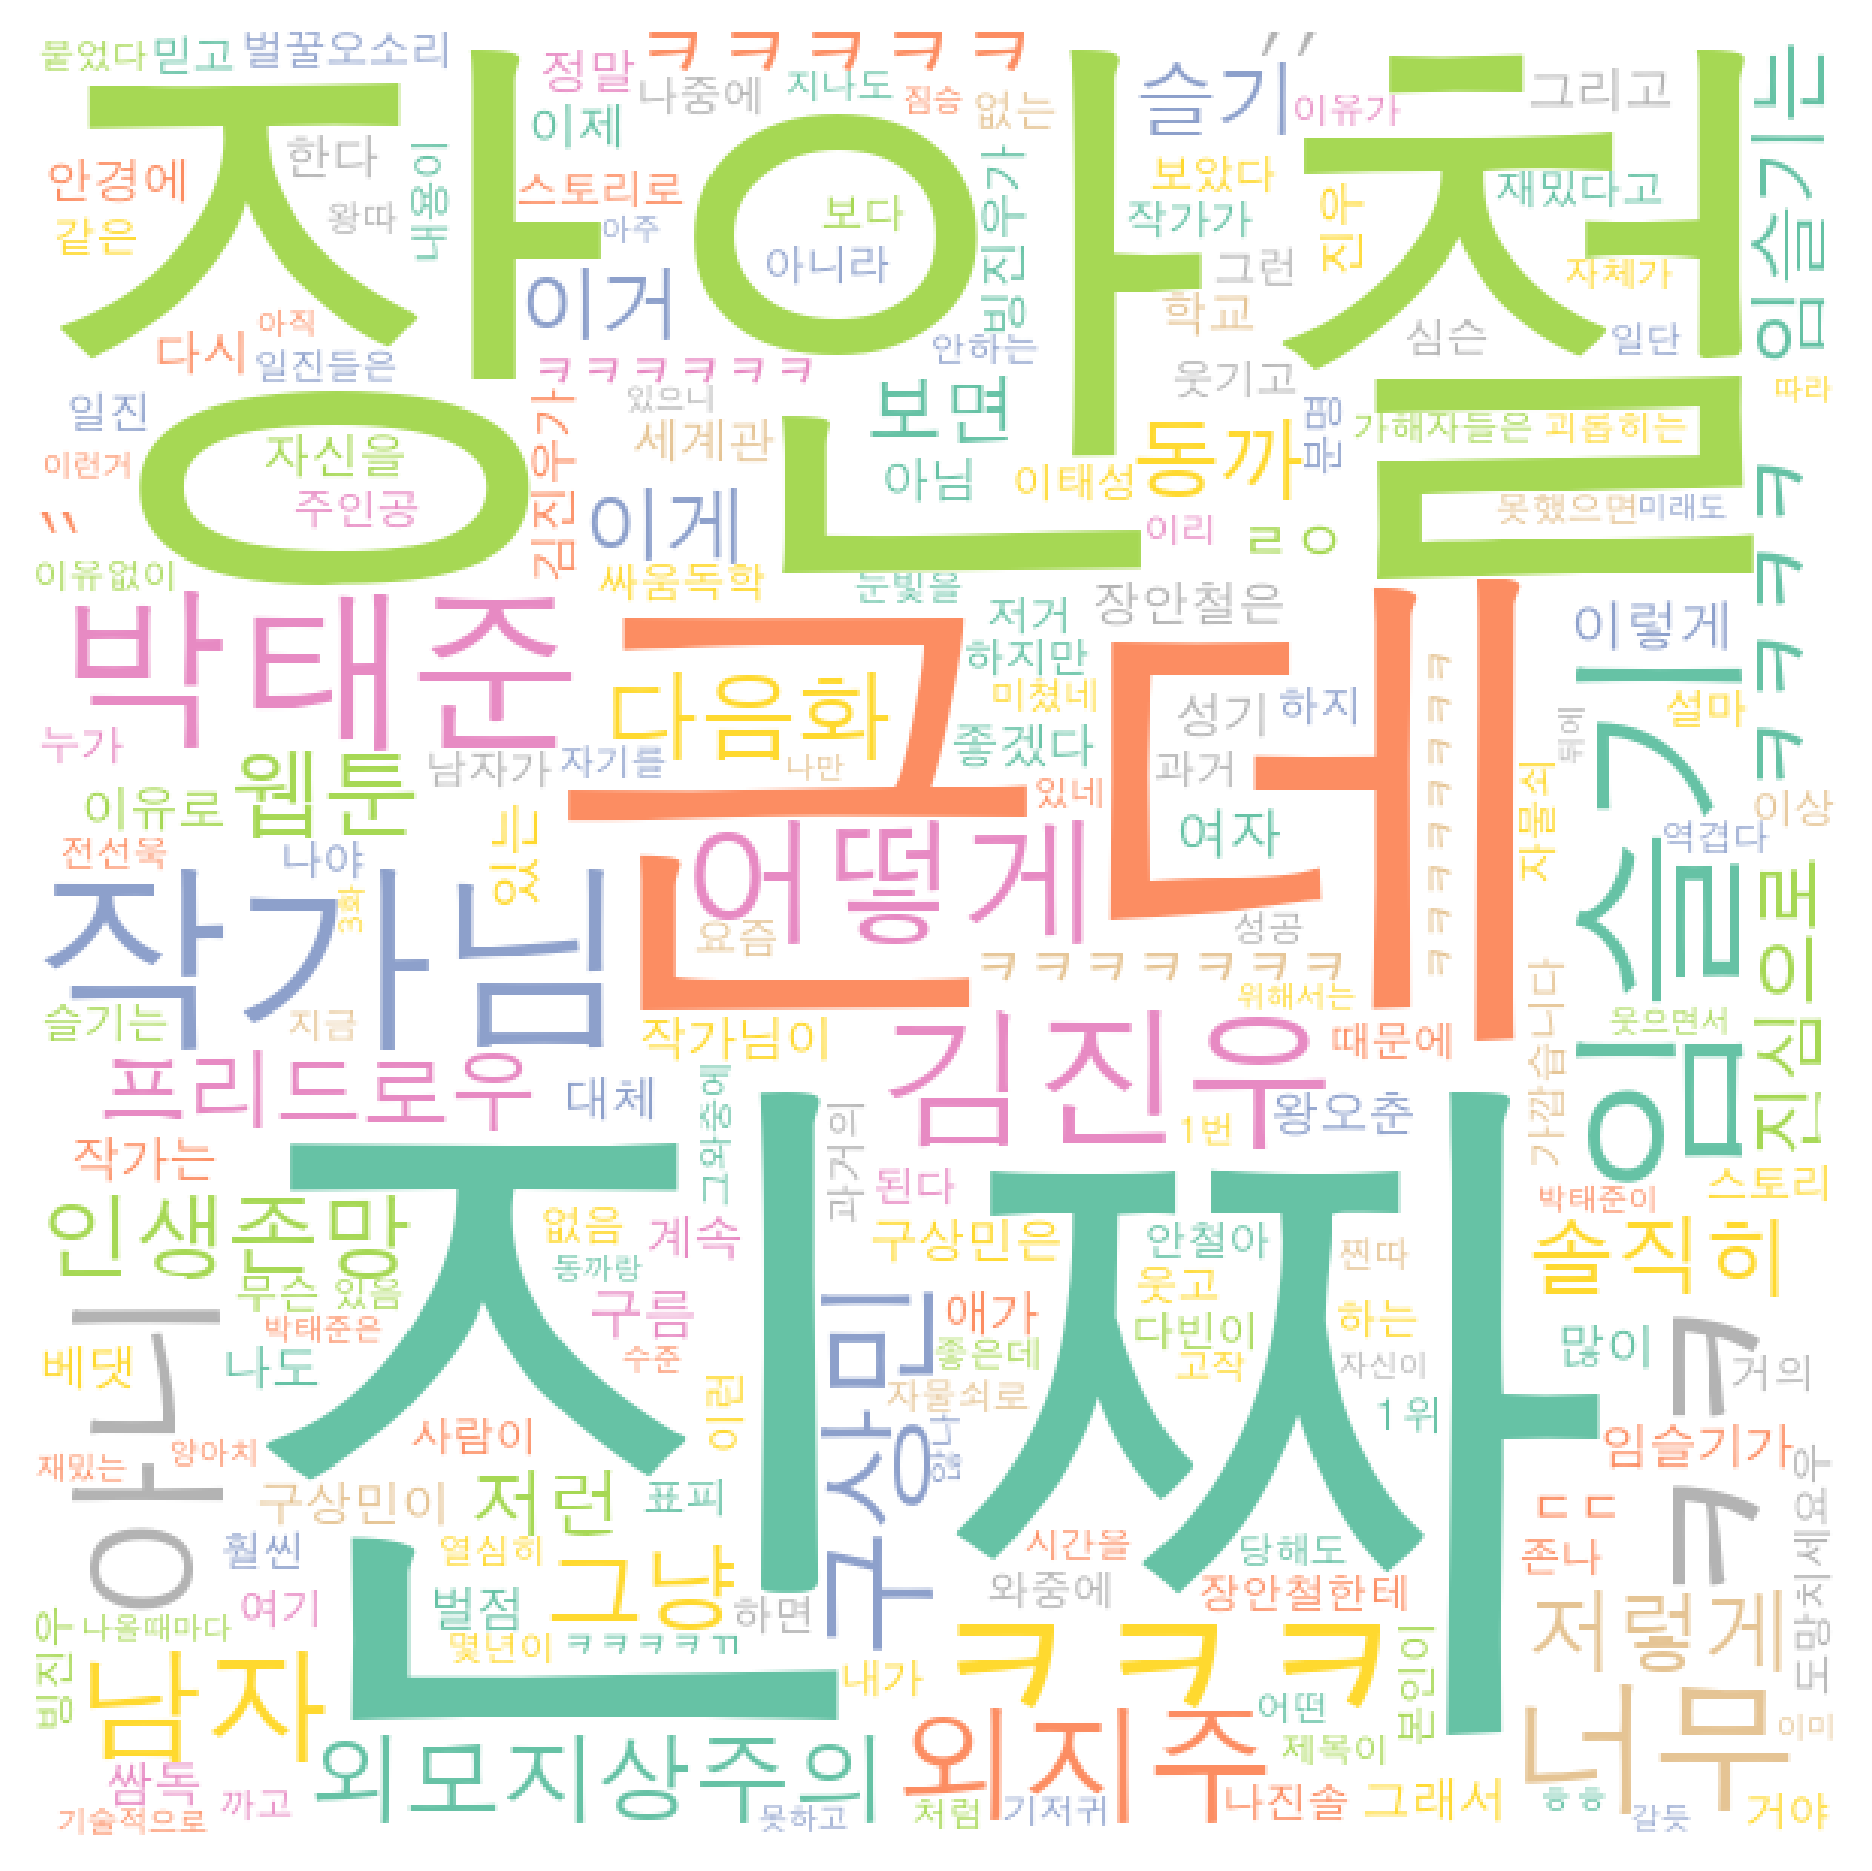

In [114]:
# 사용빈도 카운트
count = Counter(token_rm)
tags = count.most_common(300)

df = pd.DataFrame(tags)
df.rename(columns={0: 'tag', 1: 'count'}, inplace=True)

# barplot = sns.barplot(x=df['tag'][:40], y=df['count'][:40], data=df[:40])
# plt.xticks(rotation=90, fontsize=10); plt.show()

wordcolud = WordCloud(font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf', background_color='white', colormap='Set2', width=600, height=600)

cloud = wordcolud.generate_from_frequencies(dict(tags))
cloudplot = plt.figure(figsize=(10, 8))
# plt.title(f'{platform}의 채용공고에서 자주 언급된 단어')
plt.axis('off'); plt.imshow(cloud); plt.show()

In [115]:
comment_removed

['떨어진앤줄알았는데',
 '괴롭힌애네',
 '외모지상주의',
 '박태준',
 '작가님이랑',
 '프리드로우',
 '전선욱',
 '작가님',
 '조합이라니',
 'ㄷㄷ',
 '어떤',
 '학원물이',
 '생길지',
 '미쳤네',
 '일진이',
 '찐따몸에',
 '들어가서',
 '과거',
 '자기를',
 '만난거임',
 'ㅋㅋㅋㅋㄲ',
 '진짜',
 '일진들은',
 '나중에',
 '열심히',
 '살아도',
 '절대',
 '성공',
 '못했으면',
 '작가님들',
 '조합',
 'ㅁㅊ네',
 '지금',
 '유튜브만',
 '봐도',
 '일진들',
 '대성공했던데ㅋㅋㅋㅋㅋ',
 '외제차끌고',
 '술집차리고',
 '몰래카메라',
 '주작하고',
 '댓글들은',
 '웃기고',
 '잘생겼다며',
 '빨아주고ㅋㅋ',
 'ㅋㅋ',
 '밑에',
 '지양아치라고',
 '자랑하는애',
 '있네',
 'Galois',
 '2019-11-10',
 '23:22나도',
 '학창시절때',
 '개양아치였고',
 '애들엄청나게',
 '괴롭혔는데',
 '지금은',
 '29살인데',
 '사업하나',
 '대박터지고',
 '돈도많이벌어서',
 '20억이나있고',
 '잘나감.지금은',
 '수능공부해서',
 '명문대',
 '늦게와서',
 '대학라이프를즐기는중인데',
 '무튼',
 '나쁘게',
 '사는게',
 '제일좋음',
 'ㅋ찐따인애들은',
 '찐따인',
 '이유가',
 '다있음.찐따애들',
 '내앞에',
 '나타나면',
 '다죽일거임이러는데ㅋㅋ',
 '박제요',
 '진짜',
 '요즘',
 '세상',
 '보면',
 '권선징악은',
 '옛날',
 '얘기임',
 '안읽었는데',
 '벌써',
 '재밌을꺼',
 '같지',
 '주제',
 '신박하네',
 '일진',
 '학폭가해자들',
 '지들이',
 '한짓',
 '기억',
 '못하는거',
 '보면',
 '진짜',
 '화나죽겠음',
 '피해자들은',
 '몇년이',
 '지나도',
 '고통받는데',
 '가해자들은',
 '몇년이',
 '지나도',
 '지들',
 '나

In [116]:
words = []
for text in comment_removed:
    for word in text.split(' '):
        words.append(word)
        
words = set(words)
words

{'2화에서',
 '구상민이',
 '모든여자가',
 '행동보고',
 '기술은',
 '고집하던',
 '검은맘바를',
 '벌꿀오소리는',
 '18',
 '90',
 '이번엔',
 '하드웨어는',
 '심슨',
 '배댓',
 '출산',
 '강해서',
 'sns에서',
 '조합',
 'ㄹㅇ전설이다..그찐따같던',
 '느낌인데',
 '중학생이',
 '놀랍게도',
 '저리나면',
 '멍청해보여서',
 '못참아서',
 '나대거나',
 '간거냐..',
 '아프게',
 '로맨티스트는',
 '안경이었던',
 '느꼈다.더',
 '1톤도',
 '신천지',
 '여기',
 '강했지너무',
 '여자라면',
 '민폐짓',
 'ㅈㄴ웃겨서',
 '에서',
 '같은데ㅋㅋㅋㅋ',
 '하여간',
 '여자애들아니냐',
 '보네',
 '부활남',
 '좋아요누르고',
 '불금',
 '넘기는거',
 '여성독자네',
 '손에',
 '펀치',
 '뭐같다',
 '돈주고도',
 'ㅅㄲ들은',
 '강동',
 '담배',
 '운영하는데',
 '네이버',
 '장안철대신',
 '일해회',
 '때문은',
 '니코니코',
 '끌었다..임슬기',
 '치운다',
 '사람들이',
 '보고있었는데',
 '만난거임',
 '실제로',
 '저거는',
 '갔으면',
 '되는건가..',
 '못사는거다',
 '거부한',
 '같은데',
 '찾아가봤습니다',
 '작은',
 '불행하길',
 '둘의',
 '자기보다',
 '싸움독학강남',
 '이후로',
 '인가봐요',
 '좋겠다',
 '보고있냐',
 '했고',
 '낌새',
 '학교에서는',
 '롯데월드에서',
 '구상민이랑',
 'ㅈㄴ재밌긴',
 '갱생이아니라',
 '제일',
 '장안철같은',
 '근데저런애들특징은',
 '본격적으로',
 '해제할수있었으나',
 '털기도',
 '그와중에',
 '볼때마다',
 '하루미',
 '어케치노',
 '놀이공원에서',
 '비뇨기과에서',
 '크루헤드',
 '지ㅈ..진우야',
 '작가님',
 '다빈이',
 '노래부르겠지',
 '좋겄네',
 '희화화도',
 '뭐야',


In [117]:
# data generation

word2int = {}

for i, word in enumerate(words):
    word2int[word] = i
word2int

{'2화에서': 0,
 '구상민이': 1,
 '모든여자가': 2,
 '행동보고': 3,
 '기술은': 4,
 '고집하던': 5,
 '검은맘바를': 6,
 '벌꿀오소리는': 7,
 '18': 8,
 '90': 9,
 '이번엔': 10,
 '하드웨어는': 11,
 '심슨': 12,
 '배댓': 13,
 '출산': 14,
 '강해서': 15,
 'sns에서': 16,
 '조합': 17,
 'ㄹㅇ전설이다..그찐따같던': 18,
 '느낌인데': 19,
 '중학생이': 20,
 '놀랍게도': 21,
 '저리나면': 22,
 '멍청해보여서': 23,
 '못참아서': 24,
 '나대거나': 25,
 '간거냐..': 26,
 '아프게': 27,
 '로맨티스트는': 28,
 '안경이었던': 29,
 '느꼈다.더': 30,
 '1톤도': 31,
 '신천지': 32,
 '여기': 33,
 '강했지너무': 34,
 '여자라면': 35,
 '민폐짓': 36,
 'ㅈㄴ웃겨서': 37,
 '에서': 38,
 '같은데ㅋㅋㅋㅋ': 39,
 '하여간': 40,
 '여자애들아니냐': 41,
 '보네': 42,
 '부활남': 43,
 '좋아요누르고': 44,
 '불금': 45,
 '넘기는거': 46,
 '여성독자네': 47,
 '손에': 48,
 '펀치': 49,
 '뭐같다': 50,
 '돈주고도': 51,
 'ㅅㄲ들은': 52,
 '강동': 53,
 '담배': 54,
 '운영하는데': 55,
 '네이버': 56,
 '장안철대신': 57,
 '일해회': 58,
 '때문은': 59,
 '니코니코': 60,
 '끌었다..임슬기': 61,
 '치운다': 62,
 '사람들이': 63,
 '보고있었는데': 64,
 '만난거임': 65,
 '실제로': 66,
 '저거는': 67,
 '갔으면': 68,
 '되는건가..': 69,
 '못사는거다': 70,
 '거부한': 71,
 '같은데': 72,
 '찾아가봤습니다': 73,
 '작은': 74,
 '불행하길': 75,
 '둘의': 76,
 '자기보다': 77,


In [133]:
# sentences = []
# for sentence in comment_sentence:
#     sentences.append(sentence.split())
# sentences

In [134]:
# for sentence in sentences:
#     for idx, word in enumerate(sentence):
#         print(word)

In [136]:
# WINDOW_SIZE = 2

# data = []
# for sentence in sentences:
#     for idx, word in enumerate(sentence):
#         for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence))]:
#             if neighbor != word:
#                 data.append([word, neighbor])
# data

In [138]:
# # for text in comment_removed:
# #     print(text)
    
# df = pd.DataFrame(data, columns=['input', 'label'])
# df

In [139]:
# # define tenserflow graph
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# ONE_HOT_DIM = len(words)
# ONE_HOT_DIM

In [123]:
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

In [124]:
X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))

KeyError: '떨어진'

In [125]:
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [126]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 10000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

ValueError: Cannot feed value of shape (0,) for Tensor 'Placeholder:0', which has shape '(?, 2740)'

In [127]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.32152143 -1.5555128 ]
 [-1.525871   -1.1833773 ]
 [-0.258682   -1.1469511 ]
 ...
 [ 0.6357117   1.8728492 ]
 [-1.1569495  -1.5259095 ]
 [-1.8918319  -0.16581345]]


In [128]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

word        x1        x2
0      2화에서 -0.321521 -1.555513
1      구상민이 -1.525871 -1.183377
2     모든여자가 -0.258682 -1.146951
3      행동보고 -0.027031 -0.445212
4       기술은 -1.596185 -2.039949
...     ...       ...       ...
2735    안철아 -3.117414 -0.519774
2736    하루도 -0.155690 -0.395535
2737    지방이  0.635712  1.872849
2738    큰그림 -1.156950 -1.525910
2739   찾아가서 -1.891832 -0.165813

[2740 rows x 3 columns]

In [132]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1, x2))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)
plt.reParamx

plt.show()